# Introduction
The data analysis aims to study the nature and intensity of traffic accidents in the US. The project uses US Accident (2016-2023).

# Objectives

- Find the key factors causing accidents and their risk levels
- Find factors that could be used to predict the likelihood of a serious accident
- Find relevant features which could help build a model that can predict the likelihood and seriousness of an accident before its occurance

## Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.stats import boxcox

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

# To suppress some warnings
import warnings
 
# Suppress FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

# Suppress Deprecation warning

warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-car-accidents2016-2023-sampled/US_Accidents_March23_sampled_500k.csv


## 1. Data Overview & Preprocessing

In [4]:
df = pd.read_csv('/kaggle/input/us-car-accidents2016-2023-sampled/US_Accidents_March23_sampled_500k.csv')
print("The shape of data is:",(df.shape))
df.head()

The shape of data is: (500000, 46)


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,NaN,NaN,0.000,Accident on LA-19 Baker-Zachary Hwy at Lower Zachary Rd.,Highway 19,Zachary,East Baton Rouge,LA,70791-4610,US,US/Central,KBTR,2019-06-12 09:53:00,77.0,77.0,62.0,29.92,10.0,NW,5.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
1,A-4694324,Source1,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,38.990037,-77.398282,0.056,Incident on FOREST RIDGE DR near PEPPERIDGE PL Drive with caution.,Forest Ridge Dr,Sterling,Loudoun,VA,20164-2813,US,US/Eastern,KIAD,2022-12-03 23:52:00,45.0,43.0,48.0,29.91,10.0,W,5.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-5006183,Source1,2,2022-08-20 13:13:00.000000000,2022-08-20 15:22:45.000000000,34.661189,-120.492822,34.661189,-120.492442,0.022,Accident on W Central Ave from Floradale Ave to Western Ave.,Floradale Ave,Lompoc,Santa Barbara,CA,93436,US,US/Pacific,KLPC,2022-08-20 12:56:00,68.0,68.0,73.0,29.79,10.0,W,13.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
3,A-4237356,Source1,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,43.680574,-92.972223,1.054,Incident on I-90 EB near REST AREA Drive with caution.,14th St NW,Austin,Mower,MN,55912,US,US/Central,KAUM,2022-02-21 17:35:00,27.0,15.0,86.0,28.49,10.0,ENE,15.0,0.0,Wintry Mix,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
4,A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,35.395476,-118.985995,0.046,RP ADV THEY LOCATED SUSP VEH OF 20002 - 726 CRAWFORD,River Blvd,Bakersfield,Kern,CA,93305-2649,US,US/Pacific,KBFL,2020-12-04 01:54:00,42.0,42.0,34.0,29.77,10.0,CALM,0.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night


### 1.1 Overview of dataset

### 1.2 Reporting sources

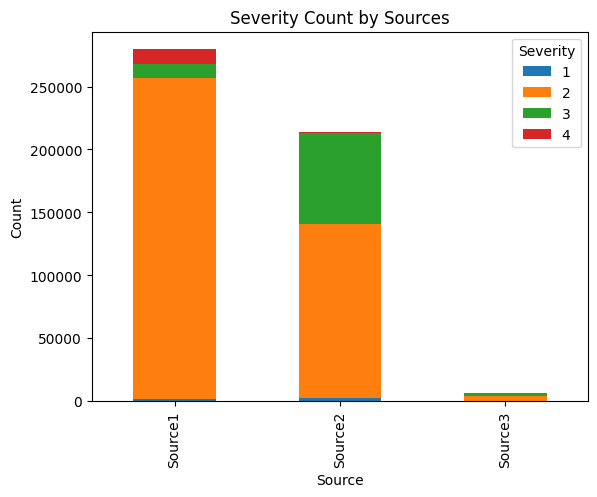

In [5]:
# Creating a stacked bar plot to visualize the composition of different severity levels within each source

# Group by severity and source column --> returns a series
# reset the series index and rename the series column using name parameter
df_grouped = df.groupby(['Severity', 'Source']).size().reset_index(name='Count')

# Pivot the DataFrame to have 'Source' as index and 'Severity' as columns
df_pivot = df_grouped.pivot(index='Source', columns='Severity', values='Count').fillna(0)
df_pivot

# Plot the stacked bar chart
df_pivot.plot(kind='bar', stacked=True, title='Severity Count by Sources')
plt.xlabel('Source')
plt.ylabel('Count')
plt.show()

The stacked barch chart shows the proportion of different severity levels in each sources. There is significant variations across the sources. In source1 accidents of severity level 2 dominate than the other. For source2 the accidents of type 4 are so rare they are barely visible in the plot. It appears that these significant differences across sources occurs may be due to the different kinds of accidents they tend to collect or the different definitions of severity level. 

Clearly we can't use data from all the sources at the same time

Let's check for the **Impact Distance** and **Duration** to see whether the severity of accidents means same across all the sources. 

In [6]:
# Converting the Start_Time column to DateTime object

df.Start_Time = pd.to_datetime(df.Start_Time, format="mixed")

# standardizing the Start_Time column to a single date time format
df.Start_Time = df.Start_Time.dt.strftime("%Y-%m-%d %H:%M:%S") # Output is in string format

# converting Start_Time column back to DateTime object
df.Start_Time = pd.to_datetime(df.Start_Time)

# Converting the End_Time column to DateTime object

df.End_Time = pd.to_datetime(df.End_Time, format="mixed")

# standardizing the Start_Time column to a single date time format
df.End_Time = df.End_Time.dt.strftime("%Y-%m-%d %H:%M:%S") # Output is in string format

# converting Start_Time column back to DateTime object
df.End_Time = pd.to_datetime(df.End_Time)

In [7]:
# Calculate duration as the difference between end time and start time in minute
df['Duration'] = df.End_Time - df.Start_Time 
df['Duration'] = df.Duration.apply(lambda x: round(x.total_seconds()/60))
print("The overall mean duration is: ", (round(df['Duration'].mean(),3)), 'minutes')

The overall mean duration is:  421.991 minutes


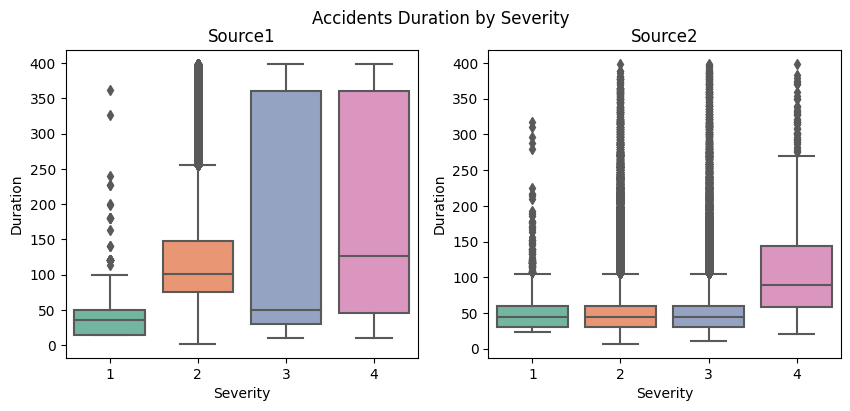

In [8]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))

sns.boxplot(x="Severity", y="Duration",data=df.loc[(df['Source']=="Source1") & (df['Duration']<400),], palette="Set2", ax=axs[0])
axs[0].set_title("Source1")

sns.boxplot(x="Severity", y="Duration",data=df.loc[(df['Source']=="Source2") & (df['Duration']<400),], palette="Set2", ax=axs[1])
axs[1].set_title("Source2")

fig.suptitle('Accidents Duration by Severity', fontsize=12)
plt.show()

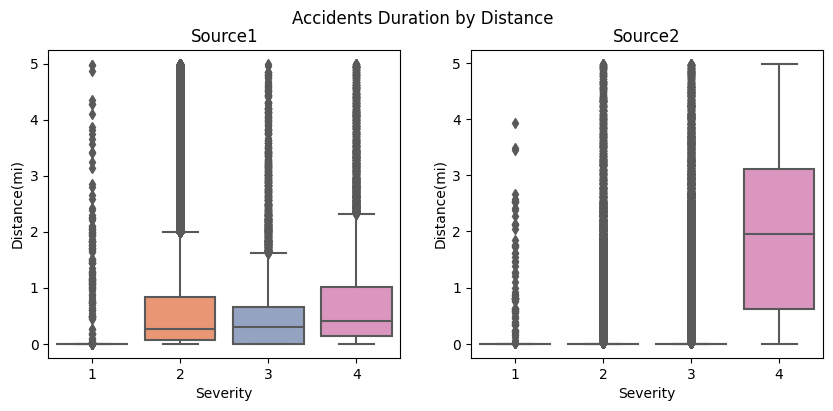

In [9]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))

sns.boxplot(x="Severity", y="Distance(mi)",data=df.loc[(df['Source']=="Source1") & (df['Distance(mi)']<5),], palette="Set2", ax=axs[0])
axs[0].set_title("Source1")

sns.boxplot(x="Severity", y="Distance(mi)",data=df.loc[(df['Source']=="Source2") & (df['Distance(mi)']<5),], palette="Set2", ax=axs[1])
axs[1].set_title("Source2")

fig.suptitle('Accidents Duration by Distance', fontsize=12)
plt.show()

#### Understanding the box-plot 

**Visual inferences**

- The line inside the box marks the median, providing a clear indication of where the middle of the dataset lies

- The box in a box plot represents the IQR, which is the range between the first quartile (25th percentile) and the third quartile (75th percentile)
  
    - First Quartile (Q1): The value below which 25% of the data falls
    - Third Quartile (Q3): The value below which 75% of the data falls
    
- The IQR covers the middle 50% of your data.

- Whiskers extend to 1.5 times the IQR above Q3 and below Q1, helping to identify potential outliers

- If the median is closer to the lower quartile, it indicates a right-skewed distribution; if it’s closer to the upper quartile, it indicates a left-skewed distribution

**Median used in boxplots**

- Resilence to outliers: better measure of the central tendency for skewed distributions

- Skewed distributions: For data like accident durations, which are often right-skewed (many short durations and a few long ones), the median provides a more accurate representation of the typical duration

**Importance of IQR**

- Resistance to Outliers: Unlike the range, which is affected by the smallest and largest values, the IQR is not influenced by outliers and extreme values. This makes it a more robust measure of spread for skewed distributions

- Measure of Spread: The IQR helps to understand how the data is spread around the median. A larger IQR indicates more variability in the middle 50% of the data, while a smaller IQR suggests that the data points are closer together

#### Accident Duration by Severity

The box plots show the distribution of accident durations categorized by severity based on data from sources *source1* and *source2*

- It is clear the same severity level hold different means for Source1 and Source2
- The outliers also vary largely in both sources

Since it is the accidents of highest severity that comes in our interest, we will drop source2 and continue with source1.

In [10]:
df = df.loc[df.Source == "Source2",]
df = df.drop(['Source'], axis=1)
print("The shape of data is:",(df.shape))

The shape of data is: (214044, 46)


### 1.3 Useless Features

Features - 'ID', 'Distance(mi)', 'End_Time', 'Duration', 'End_Lng' can be collected only after the accident has already happened and hece cannot be predictors for serious accident prediction. Let's remove these. Further for description, the POI features have already been extracted from it by the dataset creators

In [11]:
df = df.drop(['ID', "Description", "Distance(mi)", 'End_Time', "Duration", "End_Lat", "End_Lng"], axis=1)

Check out some categorical column

In [12]:
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns
unique_counts = df[categorical_columns].nunique()
unique_counts

Street                    42368
City                       6625
County                     1230
State                        47
Zipcode                   62000
Country                       1
Timezone                      4
Airport_Code               1524
Weather_Timestamp        138229
Wind_Direction               24
Weather_Condition            92
Amenity                       2
Bump                          2
Crossing                      2
Give_Way                      2
Junction                      2
No_Exit                       2
Railway                       2
Roundabout                    2
Station                       2
Stop                          2
Traffic_Calming               2
Traffic_Signal                2
Turning_Loop                  1
Sunrise_Sunset                2
Civil_Twilight                2
Nautical_Twilight             2
Astronomical_Twilight         2
dtype: int64

Drop 'Country' and 'Turning_Loop' for they have only one class.

In [13]:
df = df.drop(['Country','Turning_Loop'], axis=1)

### 1.4 Clean up Categorical Features

If we look at categorical features closely, we will find some chaos in 'Wind_Direction' and 'Weather_Condition'. It is necessary to clean them up first.

#### Wind Direction

In [14]:
df.Wind_Direction.unique()

array(['NW', 'W', 'S', 'E', 'Variable', 'West', 'NNE', 'CALM', 'ENE',
       'NNW', 'North', 'SSW', 'Calm', 'ESE', 'VAR', 'East', 'WNW',
       'South', 'WSW', nan, 'SSE', 'SE', 'SW', 'NE', 'N'], dtype=object)

In [15]:
df.loc[df['Wind_Direction']=='Calm','Wind_Direction'] = 'CALM'
df.loc[(df['Wind_Direction']=='West')|(df['Wind_Direction']=='WSW')|(df['Wind_Direction']=='WNW'),'Wind_Direction'] = 'W'
df.loc[(df['Wind_Direction']=='South')|(df['Wind_Direction']=='SSW')|(df['Wind_Direction']=='SSE'),'Wind_Direction'] = 'S'
df.loc[(df['Wind_Direction']=='North')|(df['Wind_Direction']=='NNW')|(df['Wind_Direction']=='NNE'),'Wind_Direction'] = 'N'
df.loc[(df['Wind_Direction']=='East')|(df['Wind_Direction']=='ESE')|(df['Wind_Direction']=='ENE'),'Wind_Direction'] = 'E'
df.loc[df['Wind_Direction']=='Variable','Wind_Direction'] = 'VAR'
print("Wind Direction after simplification: ", df['Wind_Direction'].unique())

Wind Direction after simplification:  ['NW' 'W' 'S' 'E' 'VAR' 'N' 'CALM' nan 'SE' 'SW' 'NE']


#### Weather

Weather is a crucial factor influcencing accidents and their fatality. Wet road, winter and fog conditions are major causes. To extract the weather information first let's look at what we have in 'Weather_Condition' Feature

In [16]:
df.Weather_Condition.unique()

array(['Fair', 'Cloudy', 'Clear', 'Scattered Clouds', 'Mostly Cloudy',
       'Light Rain', 'Partly Cloudy', 'Light Snow', 'Overcast', nan,
       'Thunderstorms and Rain', 'Light Rain with Thunder', 'T-Storm',
       'Rain', 'Fog', 'Cloudy / Windy', 'Light Drizzle', 'Heavy T-Storm',
       'Blowing Dust / Windy', 'Thunder in the Vicinity', 'Haze',
       'Heavy Thunderstorms and Rain', 'Heavy Rain', 'Shallow Fog',
       'Patches of Fog', 'Thunderstorm', 'Drizzle', 'Smoke', 'Thunder',
       'Light Thunderstorms and Rain', 'Mist', 'N/A Precipitation',
       'Snow', 'Light Freezing Drizzle', 'Mostly Cloudy / Windy',
       'Light Rain / Windy', 'Wintry Mix', 'Fair / Windy',
       'Partly Cloudy / Windy', 'T-Storm / Windy', 'Rain / Windy',
       'Heavy Rain / Windy', 'Heavy T-Storm / Windy',
       'Showers in the Vicinity', 'Light Freezing Rain', 'Snow and Sleet',
       'Heavy Snow', 'Snow / Windy', 'Light Freezing Fog',
       'Sand / Dust Whirlwinds', 'Squalls / Windy',
       'T

In [17]:
# show distinctive weather conditions 

# Join all unique weather conditions into a single string
weather = '!'.join(df['Weather_Condition'].dropna().unique().tolist())

# Split the string based on various delimiters and keywords
weather_conditions = np.unique(np.array(re.split(
    "!|\s/\s|\sand\s|\swith\s|Partly\s|Mostly\s|Blowing\s|Freezing\s", weather))).tolist()

# Remove any empty strings that might result from splitting
weather_conditions = [condition for condition in weather_conditions if condition]

print("Weather Conditions: ", weather_conditions)

Weather Conditions:  ['Clear', 'Cloudy', 'Drizzle', 'Dust', 'Dust Whirlwinds', 'Fair', 'Fog', 'Funnel Cloud', 'Haze', 'Heavy ', 'Heavy Drizzle', 'Heavy Rain', 'Heavy Snow', 'Heavy T-Storm', 'Heavy Thunderstorms', 'Ice Pellets', 'Light ', 'Light Drizzle', 'Light Hail', 'Light Haze', 'Light Ice Pellets', 'Light Rain', 'Light Rain Shower', 'Light Rain Showers', 'Light Sleet', 'Light Snow', 'Light Snow Grains', 'Light Snow Showers', 'Light Thunderstorms', 'Low Drifting Snow', 'Mist', 'N/A Precipitation', 'Overcast', 'Partial Fog', 'Patches of Fog', 'Rain', 'Rain Shower', 'Rain Showers', 'Sand', 'Scattered Clouds', 'Shallow Fog', 'Showers in the Vicinity', 'Sleet', 'Small Hail', 'Smoke', 'Snow', 'Squalls', 'T-Storm', 'Thunder', 'Thunder in the Vicinity', 'Thunderstorm', 'Thunderstorms', 'Volcanic Ash', 'Widespread Dust', 'Windy', 'Wintry Mix']


Create some feature from 'Weather_condition' and drop the column

In [18]:
df['Clear'] = np.where(df['Weather_Condition'].str.contains('Clear', case=False, na = False), True, False)
df['Cloud'] = np.where(df['Weather_Condition'].str.contains('Cloud|Overcast', case=False, na = False), True, False)
df['Rain'] = np.where(df['Weather_Condition'].str.contains('Rain|storm', case=False, na = False), True, False)
df['Heavy_Rain'] = np.where(df['Weather_Condition'].str.contains('Heavy Rain|Rain Shower|Heavy T-Storm|Heavy Thunderstorms', case=False, na = False), True, False)
df['Snow'] = np.where(df['Weather_Condition'].str.contains('Snow|Sleet|Ice', case=False, na = False), True, False)
df['Heavy_Snow'] = np.where(df['Weather_Condition'].str.contains('Heavy Snow|Heavy Sleet|Heavy Ice Pellets|Snow Showers|Squalls', case=False, na = False), True, False)
df['Fog'] = np.where(df['Weather_Condition'].str.contains('Fog', case=False, na = False), True, False)

In [19]:
df = df.drop(['Weather_Condition'], axis=1)

### 1.5 Fix Datetime Format

'Weather_Timestamp' and 'Start_Time' may provide insights on the starting time of accidents. We can start analysing them

In [20]:
# Checking datatypes of 'Weather_Timestamp' and 'Start_Time'
print("Type of 'Weather_Timestamp: {}\nType of Start_Time: {}".format(df.Weather_Timestamp.dtype,df.Start_Time.dtype))

Type of 'Weather_Timestamp: object
Type of Start_Time: datetime64[ns]


In [21]:
# Converting 'Weather_Timestamp' to Datetime format
df.Weather_Timestamp = pd.to_datetime(df.Weather_Timestamp)

In [22]:
# Average difference between 'Weather_Timestamp' and 'Start_Time'
print("Mean difference b/w 'Weather_Timestamp' and 'Start_Time':", (df.Weather_Timestamp - df.Start_Time).mean())

Mean difference b/w 'Weather_Timestamp' and 'Start_Time': 0 days 00:00:36.330723293


Since both the 'Weather_Timestamp' and 'Start_Time' are almost the same we just keep 'Start_Time' and drop 'Weather_Timestamp'. 

Next we need to extract year, month, weekay, day, hour, minute from 'Start_Time' column

In [23]:
df = df.drop(['Weather_Timestamp'], axis=1)

# Adding year column to dataframe
df["Year"] = df.Start_Time.dt.year

# Adding month column to dataframe
df["Month"] = df.Start_Time.dt.month

# Adding weekday column to dataframe
df['Weekday']= df['Start_Time'].dt.weekday

# Adding day(wrt to year) column to dataframe
month = df.Start_Time.dt.month
days_each_month = np.cumsum(np.array([0,31,28,31,30,31,30,31,31,30,31,30,31]))
day = [days_each_month[arg-1] for arg in month.values]
day = day + df["Start_Time"].dt.day.values # day now converted wrt to year
df['Day'] = day

# Adding hour and minute column to dataframe
df['Hour'] = df['Start_Time'].dt.hour
df['Minute']=df['Hour']*60.0+df["Start_Time"].dt.minute

In [24]:
# Visualizing the newly added columns
df.loc[:,['Start_Time', 'Year', 'Month', 'Weekday', 'Day', 'Hour', 'Minute']]

,Start_Time,Year,Month,Weekday,Day,Hour,Minute
0,2019-06-12 10:10:56,2019,6,2,163,10,610.0
5,2021-03-29 07:03:58,2021,3,0,88,7,423.0
10,2021-08-25 07:10:09,2021,8,2,237,7,430.0
12,2020-07-16 11:03:31,2020,7,3,197,11,663.0
14,2019-05-28 07:37:44,2019,5,1,148,7,457.0
...,...,...,...,...,...,...,...
499980,2019-03-26 08:36:05,2019,3,1,85,8,516.0
499981,2017-05-05 05:08:33,2017,5,4,125,5,308.0
499983,2020-01-02 14:40:40,2020,1,3,2,14,880.0
499985,2021-04-14 16:24:16,2021,4,2,104,16,984.0


In [25]:
# Reseting the dataframe indexes
df = df.reset_index(drop=True)

df.head()

,Severity,Start_Time,Start_Lat,Start_Lng,Street,City,County,State,Zipcode,Timezone,Airport_Code,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Clear,Cloud,Rain,Heavy_Rain,Snow,Heavy_Snow,Fog,Year,Month,Weekday,Day,Hour,Minute
0,2,2019-06-12 10:10:56,30.641211,-91.153481,Highway 19,Zachary,East Baton Rouge,LA,70791-4610,US/Central,KBTR,77.0,77.0,62.0,29.92,10.0,NW,5.0,0.0,False,False,False,False,False,False,False,False,False,False,False,True,Day,Day,Day,Day,False,False,False,False,False,False,False,2019,6,2,163,10,610.0
1,2,2021-03-29 07:03:58,42.532082,-70.944267,Lowell St,Peabody,Essex,MA,01960-4275,US/Eastern,KBVY,42.0,35.0,58.0,29.37,10.0,W,13.0,0.0,False,False,False,False,False,False,False,False,False,False,False,True,Day,Day,Day,Day,False,False,False,False,False,False,False,2021,3,0,88,7,423.0
2,2,2021-08-25 07:10:09,39.933460,-86.157433,N Meridian St,Indianapolis,Hamilton,IN,46290,US/Eastern,KTYQ,70.0,70.0,97.0,29.11,10.0,S,3.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,False,True,False,False,False,False,False,2021,8,2,237,7,430.0
3,2,2020-07-16 11:03:31,34.720150,-86.616592,Governors Dr,Huntsville,Madison,AL,35805-3542,US/Central,KHUA,85.0,85.0,65.0,29.39,10.0,S,7.0,0.0,False,False,False,False,False,False,False,False,False,False,False,True,Day,Day,Day,Day,False,False,False,False,False,False,False,2020,7,3,197,11,663.0
4,2,2019-05-28 07:37:44,33.436073,-111.926163,N Scottsdale Rd,Tempe,Maricopa,AZ,85281,US/Mountain,KPHX,64.0,64.0,37.0,28.66,10.0,E,7.0,0.0,False,False,True,False,False,False,False,False,False,False,False,True,Day,Day,Day,Day,False,False,False,False,False,False,False,2019,5,1,148,7,457.0


## 2. Handling Missing Data

### 2.1 Drop Features

Checking the missing values in each column

In [26]:
missing = pd.DataFrame(df.isnull().sum()).reset_index()
missing.columns = ['Feature', 'Missing_Percent(%)']
missing['Missing_Percent(%)'] = missing['Missing_Percent(%)'].apply(lambda x: x / df.shape[0] * 100)
missing.loc[missing['Missing_Percent(%)']>0,:]

,Feature,Missing_Percent(%)
4,Street,0.050924
5,City,0.000934
8,Zipcode,0.013081
9,Timezone,0.094373
10,Airport_Code,0.199959
11,Temperature(F),1.691241
12,Wind_Chill(F),43.536843
13,Humidity(%),1.807572
14,Pressure(in),1.424941
15,Visibility(mi),1.907085


Both `Wind_Chill(F)` and `Precipitation(in)` have more than 40% of values missing. While `Wind_Chill(F)` can be dropped because it not highly related to severity. However `Precipitation(in)` is an important feature and hence can be handled by making a separate feature

### 2.2 Separate Feature

Add a new feature for missing values in `Precipitation(in)`

Replace missing values in `Precipitation(in)`

In [27]:
df = df.drop(['Wind_Chill(F)'], axis=1)

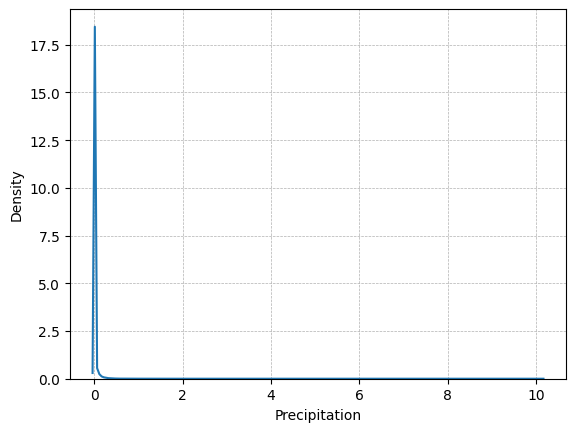

In [28]:
# Distribution of precipitation
sns.kdeplot(df['Precipitation(in)'])
plt.xlabel("Precipitation")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

- The sharp peak at 0 indicates the concentration of most of the data points
- Very narrow width of the peak implies less spread out data
- Exponentially decreasing curve suggests most of the data points to be very nearer to zero

Hence we can replace the missing values with median precipitation

In [29]:
# Adding a new feature for missing values in Precipitation(in) column
df['Precipitation_NA'] = 0
df.loc[df['Precipitation(in)'].isnull(), 'Precipitation_NA'] = 1

# Handling missing values
df['Precipitation(in)'] = df['Precipitation(in)'].fillna(df['Precipitation(in)'].median())

In [30]:
df.loc[:5, ['Precipitation(in)', 'Precipitation_NA']]

,Precipitation(in),Precipitation_NA
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0
5,0.0,1


### 2.3 Drop NaN

The counts of missing values in some features are much smaller compared to the total sample size. It is convenient to drop rows containing these missing values

Drop row by these features

- `City`
- `Zipcode`
- `Airport_Code`
- `Sunrise_Sunset`
- `Civil_Twilight`
- `Nautical_Twilight`
- `Astronomical_Twilight`

In [31]:
df = df.dropna(subset=['City', 'Zipcode', 'Airport_Code', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'])

### 2.4 Value Imputation

#### Continuous Weather Features

- `Temperature(F)`
- `Humidity(%)`
- `Pressure(in)`
- `Visibility(mi)`
- `Wind_Speed(mph)`

These columns also contain small number of missing value. Since weather data is naturally related to location and time, we will salvage only those rows that have non null location and time

- `Airport_Code` is selected as location feature since it is the sources of weather data are airport-based weather stations.
- `Start_Month` is selected as the time feature considering its computationally cheaper

First we will group the dataframe based on `Airport_Code` & `Start_Month` with each weather feature. Then the missing values in each group will be replaced by the median value of each group

In [32]:
Weather_data = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']

# Function to fill NaNs with the median in each group
def fill_na_with_median(x):
    if x.isna().all():
        return x  # Return series unchanged if all values are NaN
    else:
        return x.fillna(x.median()) # otherwise, it fills NaNs with the median value

# Group data by 'Airport_Code' and 'Month' then fill NAs with median value
print("The number of remaining missing values: ")
for i in Weather_data:
    df[i] = df.groupby(['Airport_Code', 'Month'])[i].transform(fill_na_with_median)
    print(i + " : " + df[i].isnull().sum().astype(str))


The number of remaining missing values: 
Temperature(F) : 528
Humidity(%) : 539
Pressure(in) : 519
Visibility(mi) : 1075
Wind_Speed(mph) : 1277


There are still some missing values. We will drop these for the sake of simplicity

In [33]:
df = df.dropna(subset=Weather_data)

#### Categorical Weather Features

For categorical weather features, we will use the majority category to replace the missing values

In [34]:
# Group dataframe by 'Airport_Code' and 'Month' and fill NAs with majority values
from collections import Counter
weather_cat = ['Clear', 'Cloud', 'Rain', 'Heavy_Rain', 'Snow', 'Heavy_Snow', 'Fog', 'Wind_Direction']
print("Count of missing values that will be dropped: ")
for i in weather_cat:
    df.loc[:,i] = df.groupby(['Airport_Code', 'Month'])[i].transform(lambda x: x.fillna(Counter(x).most_common()[0][0]) if all(x.isnull()) == False else x)
    print(i + " : " + df[i].isnull().sum().astype(str))

Count of missing values that will be dropped: 
Clear : 0
Cloud : 0
Rain : 0
Heavy_Rain : 0
Snow : 0
Heavy_Snow : 0
Fog : 0
Wind_Direction : 613


We will drop the missing values

In [35]:
df = df.dropna(subset=weather_cat)

## 3. EDA & Feature Engineering

### 3.1 Resampling

The accidents with severity level 4 are much more serious than accidents of other levels. Therefore we can regroup the accidents as level 4 v/s other levels

In [36]:
df['Severity4'] = 0
df.loc[df['Severity'] == 4, 'Severity4'] = 1
df = df.drop(['Severity'], axis = 1)
df.Severity4.value_counts()

Severity4
0    210664
1       908
Name: count, dtype: int64

As seen from the above the data set is highly imbalance. To address this we use a combination of over and under sampling as the dataset is large enough. Level 4 will be oversampled to 50000 and other levels will be undersampled to 50000

In [37]:
def resample(dat, col, n):
    return pd.concat([dat[dat[col]==1].sample(n, replace = True),
                      dat[dat[col]==0].sample(n)], axis=0)

In [38]:
df_bl = resample(df, 'Severity4', 50000)

print('Balanced data:', df_bl.Severity4.value_counts())

Balanced data: Severity4
1    50000
0    50000
Name: count, dtype: int64


Now we can do some exploratory analysis on the resampled data

### 3.2 Time Features

#### Year

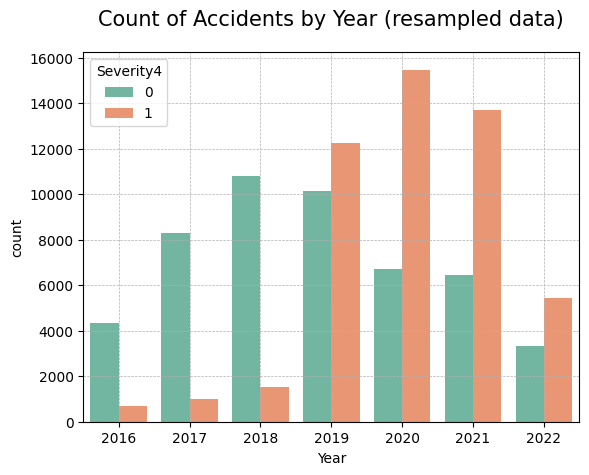

In [39]:
year_order = ['2016', '2017', '2018', '2019', '2020', '2021', '2022']

df_bl.Year = df_bl.Year.astype(str)
sns.countplot(x='Year', hue='Severity4', data=df_bl ,palette="Set2", order=year_order)
plt.title('Count of Accidents by Year (resampled data)', size=15, y=1.05)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

There must be something wrong with the data. Clearly the accident of severity level 4 have increased 5 times in 2019 compared to previous levels. Whereas for other types of accidents the trend seems to be the opposite. Let's get back to the raw data and investigate

We can create a heatmap of accidents with severity level 4 from 2020 to 2022 and see how they are distributed

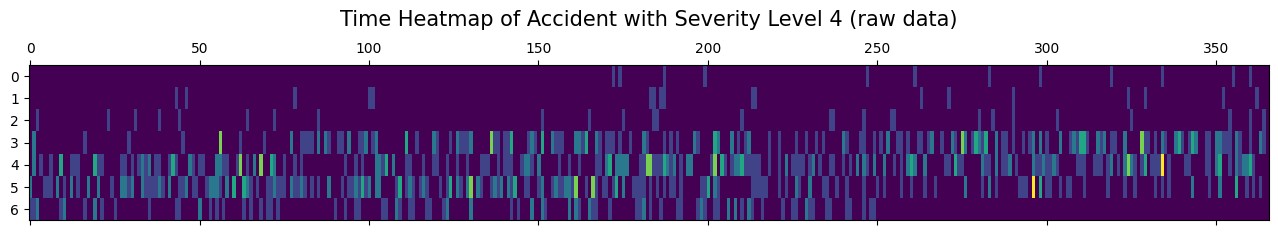

In [40]:
# create a dataframe used to plot heatmap
df_date = df.loc[:,['Start_Time','Severity4']]         # create a new dateframe only containing time and severity
df_date['date'] = df_date['Start_Time'].dt.normalize() # keep only the date part of start time
df_date = df_date.drop(['Start_Time'], axis = 1)
df_date = df_date.groupby('date').sum()                # sum the number of accidents with severity level 4 by date
df_date = df_date.reset_index().drop_duplicates()

# join the dataframe with full range of date from 2016 to 2022
full_date = pd.DataFrame(pd.date_range(start="2016-01-02",end="2022-12-31"))    
df_date = full_date.merge(df_date, how = 'left',left_on = 0, right_on = 'date')
df_date['date'] = df_date.iloc[:,0]
df_date = df_date.fillna(0)
df_date = df_date.iloc[:,1:].set_index('date')

# group by date
groups = df_date['Severity4'].groupby(pd.Grouper(freq='YE'))
years = pd.DataFrame()
for name, group in groups:
    if name.year != 2020:
        years[name.year] = np.append(group.values,0) # making non leap years same shape as 2020 (leap year)
    else:
        years[name.year] = group.values
  

# plot
years = years.T
plt.matshow(years, interpolation=None, aspect='auto')
plt.title('Time Heatmap of Accident with Severity Level 4 (raw data)', y=1.2, fontsize=15)
plt.show()

The heatmap indicates some changes had occured after Feb 2019. It might have been due to changes in data collection strategy or the way they define severity level 4. Also after Sep 2022, it appears data collection have stopped as we can hardly see any data during this time.

Anyway we have to narrow down our data again. Since the data between Mar 2019 and Sep 2022 is less imbalanced and align with future trends we will take this data and drop the rest

In [41]:
df = df.loc[(df['Start_Time'] > "2019-03-10") & (df['Start_Time'] < "2022-09-10"),:]
df = df.drop(['Year', 'Start_Time'], axis=1)
df['Severity4'].value_counts()

Severity4
0    103957
1       841
Name: count, dtype: int64

#### Month

- For most most months, the count of accidents of less serverity is higher
  
- Accidents of severity level 4 peaks in the summer months (May-July): This can be due to
  1. Better weather conditions - more incidents of reckless driving, longer trips, and possibly more fatigued drivers
     
  2. Summer vacation period - increased family trips and holiday tours
  
  On researching I found out a few articles which also state the same

   [National Highway Traffic Safety Administration (NHTSA) report for 2021](https://rosap.ntl.bts.gov/view/dot/78020) \
   [Injury Facts by National Safety Council (NSC):](https://injuryfacts.nsc.org/motor-vehicle/overview/crashes-by-month/)

- Winter months (December, January, and February) show a lower count of accidents: While winter conditions can be hazardous, people might drive more cautiously, or there might be fewer vehicles on the road due to adverse weather, leading to fewer accidents

- Among the winter months, December has slighly higher count of accidents: December is associated with holiday season travels. So there is a greater possiblility of accidents but January and February see a drop, possibly due to post-holiday caution and reduced travel
          

In [42]:
df_bl = resample(df, 'Severity4', 20000)

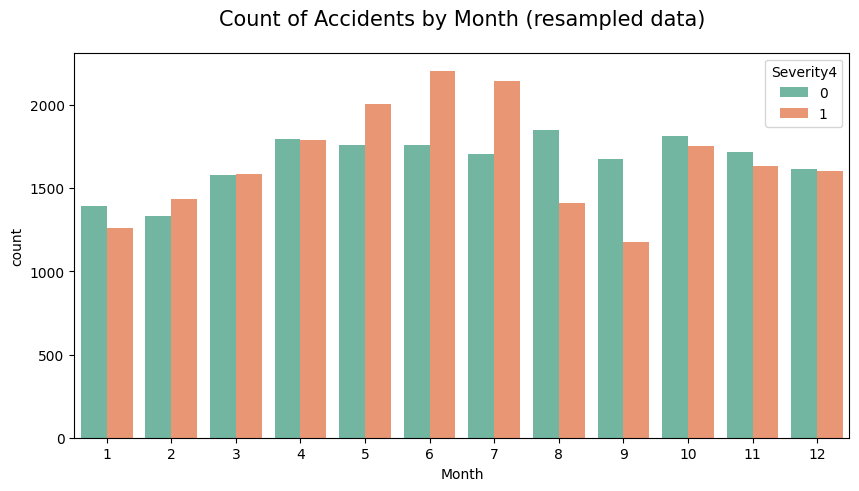

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(x='Month', hue='Severity4', data=df_bl ,palette="Set2")
plt.title('Count of Accidents by Month (resampled data)', size=15, y=1.05)
plt.show()

#### Weekday

- Large variations between weekdays and weekends - more people commuting to work, school hours, etc can be the reasons

- Higher count of less severe accidents on weekdays - congested roads, slow moving traffic

- More severe accidents increases by almost 2 times on weekends

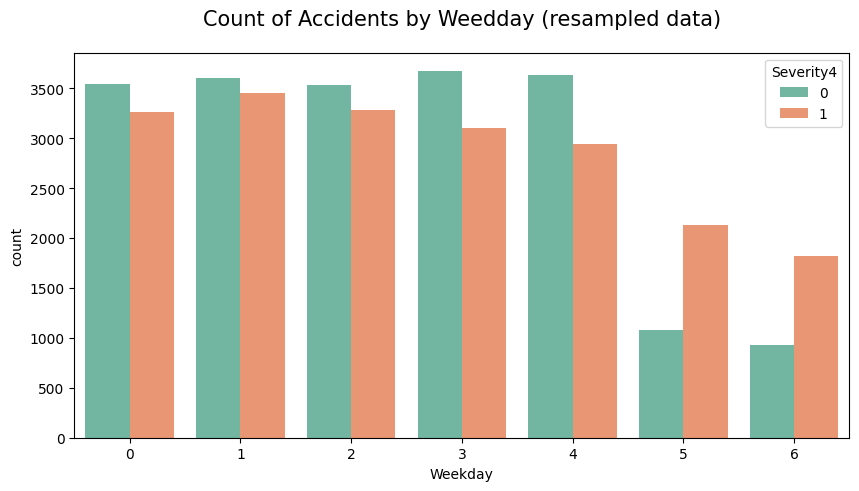

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(x='Weekday', hue='Severity4', data=df_bl ,palette="Set2")
plt.title('Count of Accidents by Weedday (resampled data)', size=15, y=1.05)
plt.show()

#### Period of Day

Accidents were less during the night but more likely to be serious

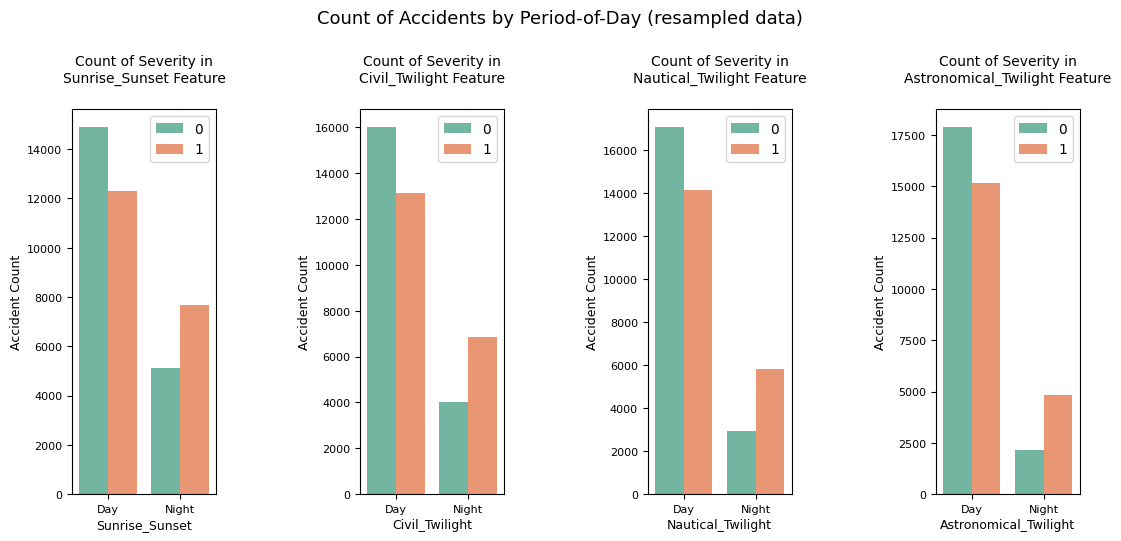

In [45]:
period_features = ['Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']
fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(13, 5))

plt.subplots_adjust(wspace = 1)
for i, feature in enumerate(period_features, 1):    
    plt.subplot(1, 4, i)
    sns.countplot(x=feature, hue='Severity4', data=df_bl ,palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=9, labelpad=3)
    plt.ylabel('Accident Count', size=9, labelpad=3)    
    plt.tick_params(axis='x', labelsize=8)
    plt.tick_params(axis='y', labelsize=8)
    
    plt.legend(['0', '1'], loc='upper right', prop={'size': 10})
    plt.title('Count of Severity in\n{} Feature'.format(feature), size=10, y=1.05)
fig.suptitle('Count of Accidents by Period-of-Day (resampled data)',y=1.08, fontsize=13)
plt.show()

#### Hour

Most accidents happended during the daytime, two peaks during morning and evening. When it comes to night, count of accidents are lower ut more likely to be serious

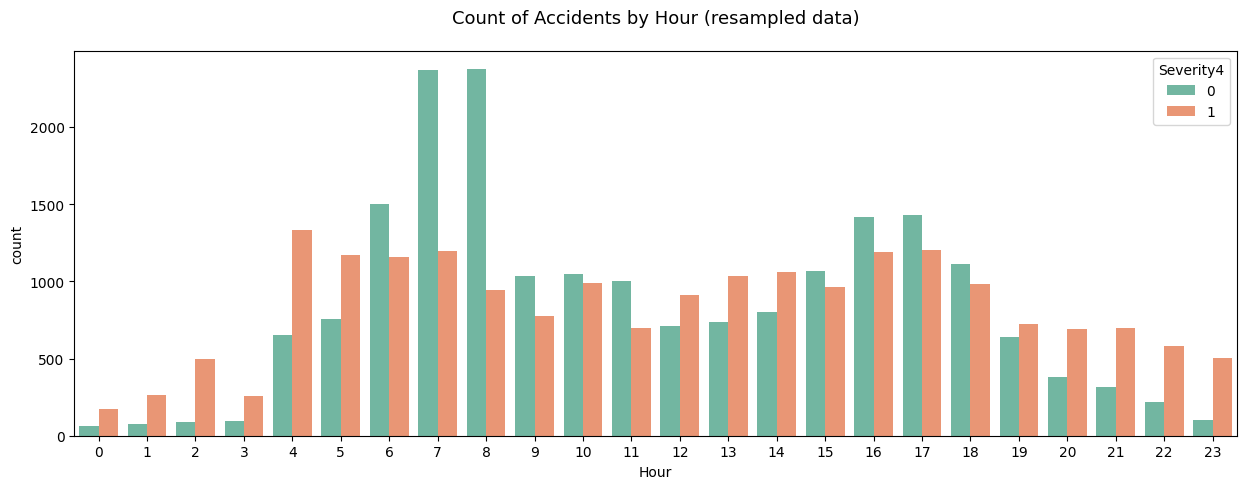

In [46]:
plt.figure(figsize=(15,5))
sns.countplot(x='Hour', hue='Severity4', data=df_bl ,palette="Set2")
plt.title('Count of Accidents by Hour (resampled data)', size=13, y=1.05)
plt.show()

#### Frequency Encoding 'Minute'

Minute can also be an important predictor. But directly using it would produce an overabundance of dummy variables. Therefore, the frequency of 'Minute' was utilized as labels, rather than 'Minute' itself. To normalize the distribution, the frequency was also transformed by log. 

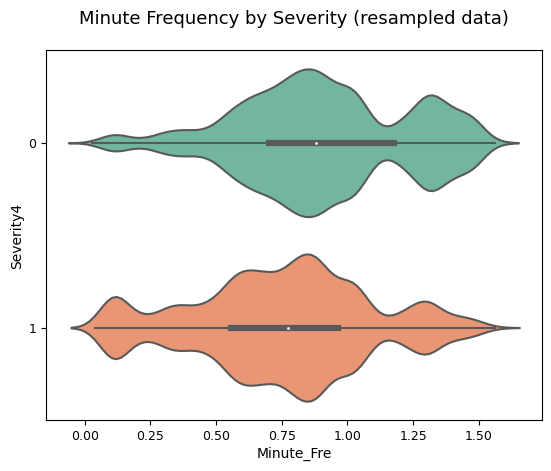

In [47]:
# Essentially we are going to transform 'Minute' column into a feature that reflects the frequency of each minute value in a normalized and log-transformed manner
#
#
# Normalization
#   1. Find the relative frequency of each minute [by dividing the count of occurances of each minute by the length of the dataset]
#   2. Scale it to reflect actual time span [Multiply by 24*60 = 1440 minutes in a day. This scaling factor helps to convert the relative frequency to a rate that represents 
#       how often a particular minute occurs in the context of a full day]
# 
#   The frequency count is now normalized to a standard time unit (in this case, minutes in a day), making the data more interpretable.
#   By doing this, you're essentially saying: "If I spread out the occurrences of each minute evenly over a typical day, how frequently would 
#   each minute occur?" This adjustment helps to capture the regularity or irregularity of events on a standardized timescale
#
#
# Log Transformation
#   It stabilizes variance, makes the data more normally distributed, and handle outliers
#
#


# Frequence encoding and log-transform
df['Minute_Freq'] = df.groupby(['Minute'])['Minute'].transform('count')
df['Minute_Freq'] = df['Minute_Freq']/df.shape[0]*24*60
df['Minute_Freq'] = df['Minute_Freq'].apply(lambda x: np.log(x+1))

# Resampling
df_bl = resample(df, 'Severity4', 20000)

# Plot
df_bl['Severity4'] = df_bl['Severity4'].astype('category')
sns.violinplot(x='Minute_Freq', y="Severity4", data=df_bl, palette="Set2")    
plt.xlabel('Minute_Fre', size=10, labelpad=3)
plt.ylabel('Severity4', size=10, labelpad=3)    
plt.tick_params(axis='x', labelsize=9)
plt.tick_params(axis='y', labelsize=9)
plt.title('Minute Frequency by Severity (resampled data)', size=13, y=1.05)
plt.show()

1. Median frequency for severity level 1 is slightly less than severity level 0. This indicates that less severe accidents happen more frequently at specific minutes compared to more severe ones. This could be due to predictable and regular patterns, such as rush hours or specific times of the day when traffic is heavy but not overly dangerous.

2. The wider spread in the beginning for accidents with higher severity level suggest that severe accidents happen less predictably and could be influenced by a variety of factors, including sudden changes in traffic conditions, driver behavior, or unexpected events

### 3.3 Address Features

#### Timezone

More accidents are happening in the eastern timezone

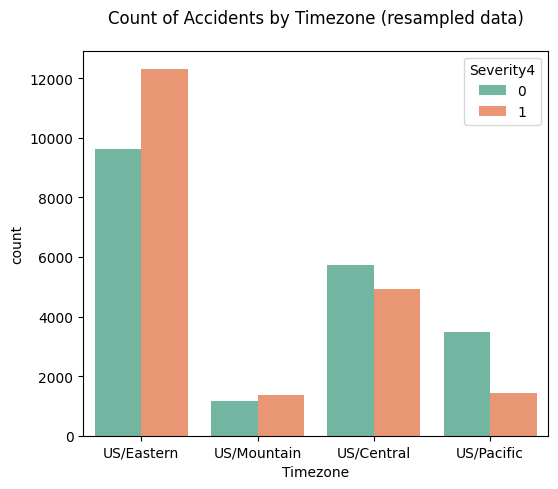

In [48]:
plt.figure(figsize=(6,5))
chart = sns.countplot(x='Timezone', hue='Severity4', data=df_bl ,palette="Set2")
plt.title("Count of Accidents by Timezone (resampled data)", size=12, y=1.05)
plt.show()

#### State

CA, FL and TX are the top 3 states with most accidents

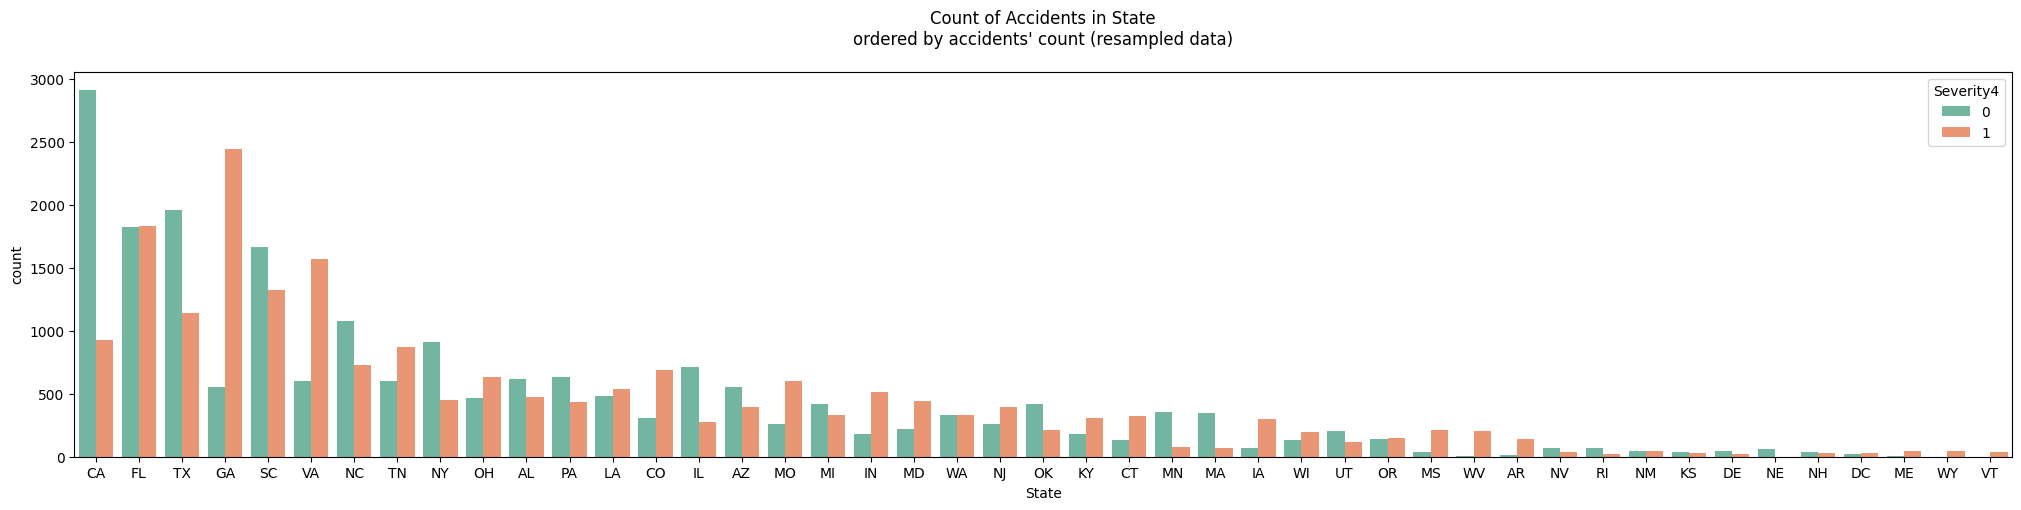

In [49]:
plt.figure(figsize=(25,5))
chart = sns.countplot(x='State', hue='Severity4', data=df_bl ,palette="Set2", order=df_bl['State'].value_counts().index)
plt.title("Count of Accidents in State\nordered by accidents' count (resampled data)", size=12, y=1.05)
plt.show()

Plotting the count of accidents with severity level 4 gives us a different story. Georgia (GA) and Florida (FL) tops the list

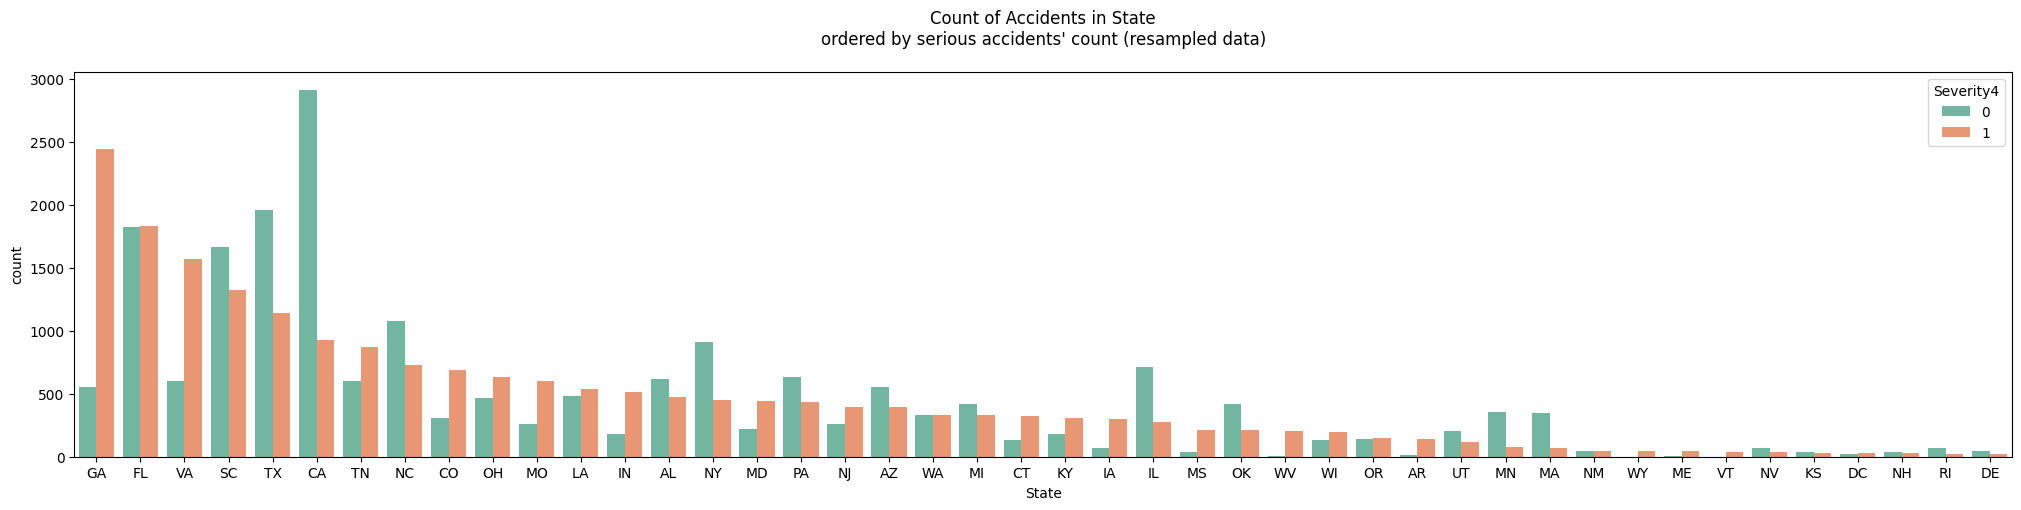

In [50]:
plt.figure(figsize=(25,5))
chart = sns.countplot(x='State', hue='Severity4', data=df_bl ,palette="Set2", order=df_bl[df_bl['Severity4']==1]['State'].value_counts().index)
plt.title("Count of Accidents in State\nordered by serious accidents' count (resampled data)", size=12, y=1.05)
plt.show()

#### County

As there are many counties we cannot visualize them like we did for states. Counties information can be used to extract other information like total population, percent of commuters who drive, take transit or walk to work and median household income.

We can fetch these additional information from ACS 5-year estimates 2022 using censusdata package

In [51]:
!pip install -q censusdata
import censusdata

# download data
county = censusdata.download('acs5', 2022, censusdata.censusgeo([('county', '*')]), ['DP05_0001E',  'DP03_0019PE','DP03_0021PE','DP03_0022PE','DP03_0062E'], tabletype='profile')

# rename columns
county.columns = ['Population_County','Drive_County','Transit_County','Walk_County','MedianHouseholdIncome_County']

county = county.reset_index()

In [52]:
# extract county name and state name from index column
county['County_y'] = county['index'].apply(lambda x : x.name.split(' County')[0].split(',')[0]).str.lower()
county['State_y'] = county['index'].apply(lambda x : x.name.split(', ')[1])

In [53]:
# Replacing the state names with abrevations
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

county['State_y'] = county['State_y'].replace(us_state_abbrev)

In [54]:
# Merging df and county

# convert all county name to lowercase 
df['County'] = df['County'].str.lower()

# left join df with census data
df = df.merge(county, left_on = ['County','State'], right_on=['County_y','State_y'],how = 'left').drop(['County_y','State_y'], axis = 1)
join_var = county.columns.to_list()[:-2]

# check how many miss match we got
print('Count of missing values before: \n', df[join_var].isnull().sum())

Count of missing values before: 
 index                           5028
Population_County               5028
Drive_County                    5028
Transit_County                  5028
Walk_County                     5028
MedianHouseholdIncome_County    5028
dtype: int64


Converting the county names to lowercase wasn't enough. Some county names in the US Accident Dataset omit 'city' or 'parish' at the end. We need to consider these too in the merge

In [55]:
# add "city" and merge again
df_city = df[df['Walk_County'].isnull()].drop(join_var, axis=1)
df_city['County_city'] = df_city['County'].apply(lambda x : x + ' city')
df_city = df_city.merge(county,left_on= ['County_city','State'],right_on = ['County_y','State_y'], how = 'left').drop(['County_city','County_y','State_y'], axis=1)
df = pd.concat((df[df['Walk_County'].isnull()==False], df_city), axis=0)


# add "parish" and merge again
df_parish = df[df['Walk_County'].isnull()].drop(join_var, axis=1)
df_parish['County_parish'] = df_parish['County'].apply(lambda x : x + ' parish')
df_parish = df_parish.merge(county,left_on= ['County_parish','State'],right_on = ['County_y','State_y'], how = 'left').drop(['County_parish','County_y','State_y'], axis=1)
df = pd.concat((df[df['Walk_County'].isnull()==False], df_parish), axis=0)

print('Count of missing values after: ', df[join_var].isnull().sum())

Count of missing values after:  index                           1735
Population_County               1735
Drive_County                    1735
Transit_County                  1735
Walk_County                     1735
MedianHouseholdIncome_County    1735
dtype: int64


Drop na and use Log transformation on some variables having extremly skewed distribution

In [56]:
# drop na
df = df.drop('index', axis = 1).dropna()

# log-transform
for i in ['Population_County','Transit_County','Walk_County']:
    df[i + '_log'] = df[i].apply(lambda x: np.log(x+1))
df = df.drop(['Population_County','Transit_County','Walk_County'], axis = 1)

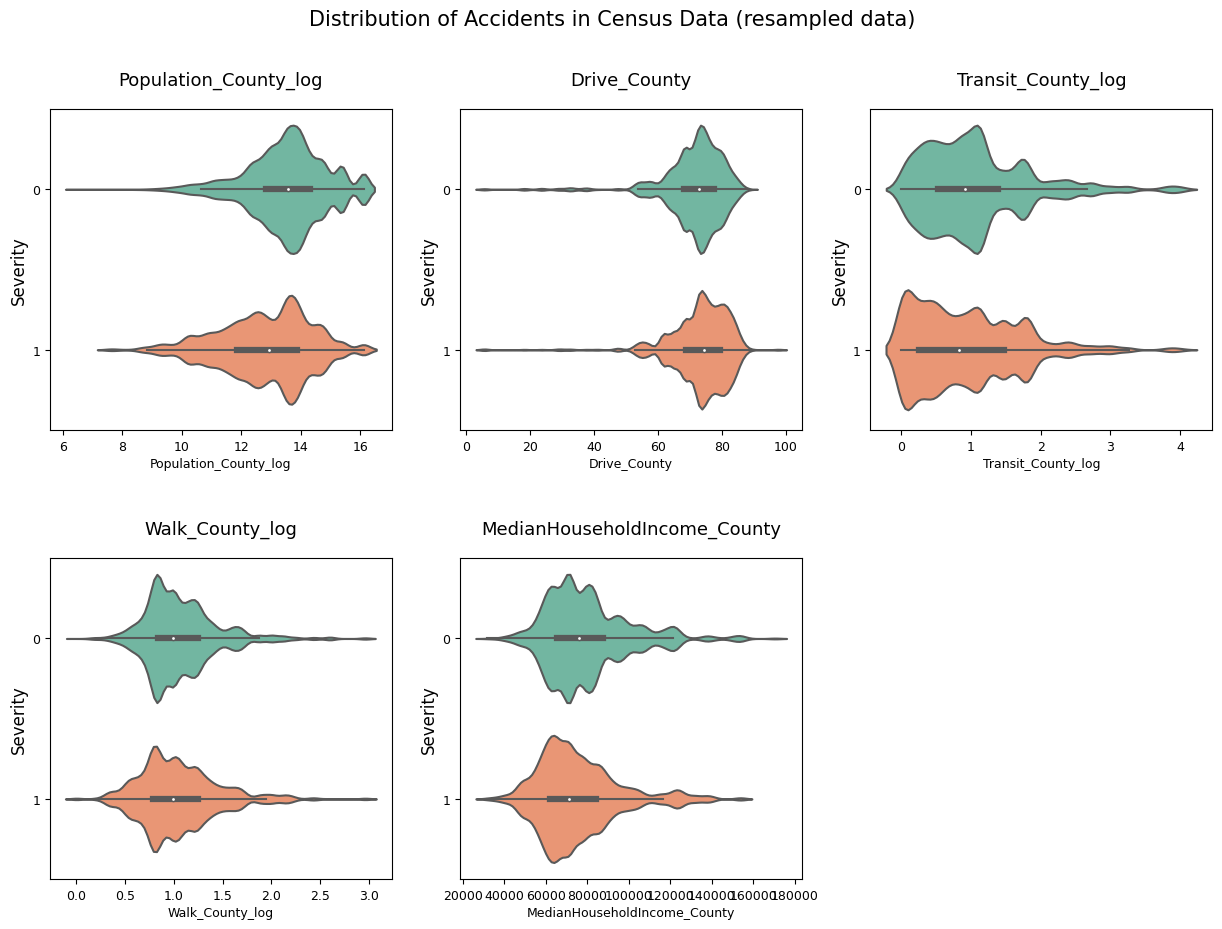

In [57]:
# resample again
df_bl = resample(df, 'Severity4', 20000)

# plot
df_bl['Severity4'] = df_bl['Severity4'].astype('category')
census_features = ['Population_County_log','Drive_County','Transit_County_log','Walk_County_log','MedianHouseholdIncome_County']
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(15, 10))
plt.subplots_adjust(hspace=0.4,wspace = 0.2)
for i, feature in enumerate(census_features, 1):    
    plt.subplot(2, 3, i)
    sns.violinplot(x=feature, y="Severity4", data=df_bl, palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=9, labelpad=3)
    plt.ylabel('Severity', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=9)
    plt.tick_params(axis='y', labelsize=9)

    plt.title('{}'.format(feature), size=13, y=1.05)
fig.suptitle('Distribution of Accidents in Census Data (resampled data)', fontsize=15)
plt.show()

Percent of people taking transit to commute seems to be related to severity. Level 4 accidents happened more frequently in those counties with a lower usage rate of transit

#### Street

There are studies showing that higher speed limits were associated with an increased likelihood of crashes and deaths. Speed limits are highly related to street type. Hence street type can be a good predictor of serious accidents. But there is no feature about street type in the original dataset though. However we can extract it from the street name

In [58]:
# create a list of top 40 most common words in street name
st_type = ' '.join(df['Street'].unique().tolist())
st_type = re.split(" |-", st_type) # split by space and hypen
st_type = [x[0] for x in Counter(st_type).most_common(40)] # select the 40 most common words
print("40 most common words")
print(*st_type, sep=', ')

40 most common words
Rd, St, Ave, Dr, N, S, W, E, Blvd, Highway, Ln, Hwy, Pkwy, I, US, State, SW, NW, NE, Way, Old, SE, Road, Route, Creek, Fwy, Lake, Expy, Hill, Pl, Park, County, Ct, CA, Pike, Cir, Valley, Trl, River, Bridge


In [59]:
# Remove some irrelevant words and add spaces and hyphen back
st_type= [' Rd', ' St', ' Dr', ' Ave', ' Blvd', ' Ln', ' Highway', ' Pkwy', ' Hwy', 
          ' Way', ' Ct', 'Pl', ' Road', 'US-', 'Creek', ' Cir',  'Route', 
          'I-', 'Trl', 'Pike', ' Fwy']
print(*st_type, sep = ", ") 

 Rd,  St,  Dr,  Ave,  Blvd,  Ln,  Highway,  Pkwy,  Hwy,  Way,  Ct, Pl,  Road, US-, Creek,  Cir, Route, I-, Trl, Pike,  Fwy


**Rd** (Road), **St** (Street), **Dr** (Drive), **Ave** (Avenue), **Blvd** (Boulevard),**Ln** (Lane), **Hwy** (Highway), **Pkwy** (Parkway), **Way**, **Ct** (Court), **Pl** (Place), **US-** (U.S. Route), **Creek** (Creek), **Cir** (Circle), **Route**, **I-** (Interstate), **Trl** (Trail), **Pike**, **Fwy** (Freeway),

Create a dummy variable for each word in the list and plot the correlation between these key words and severity

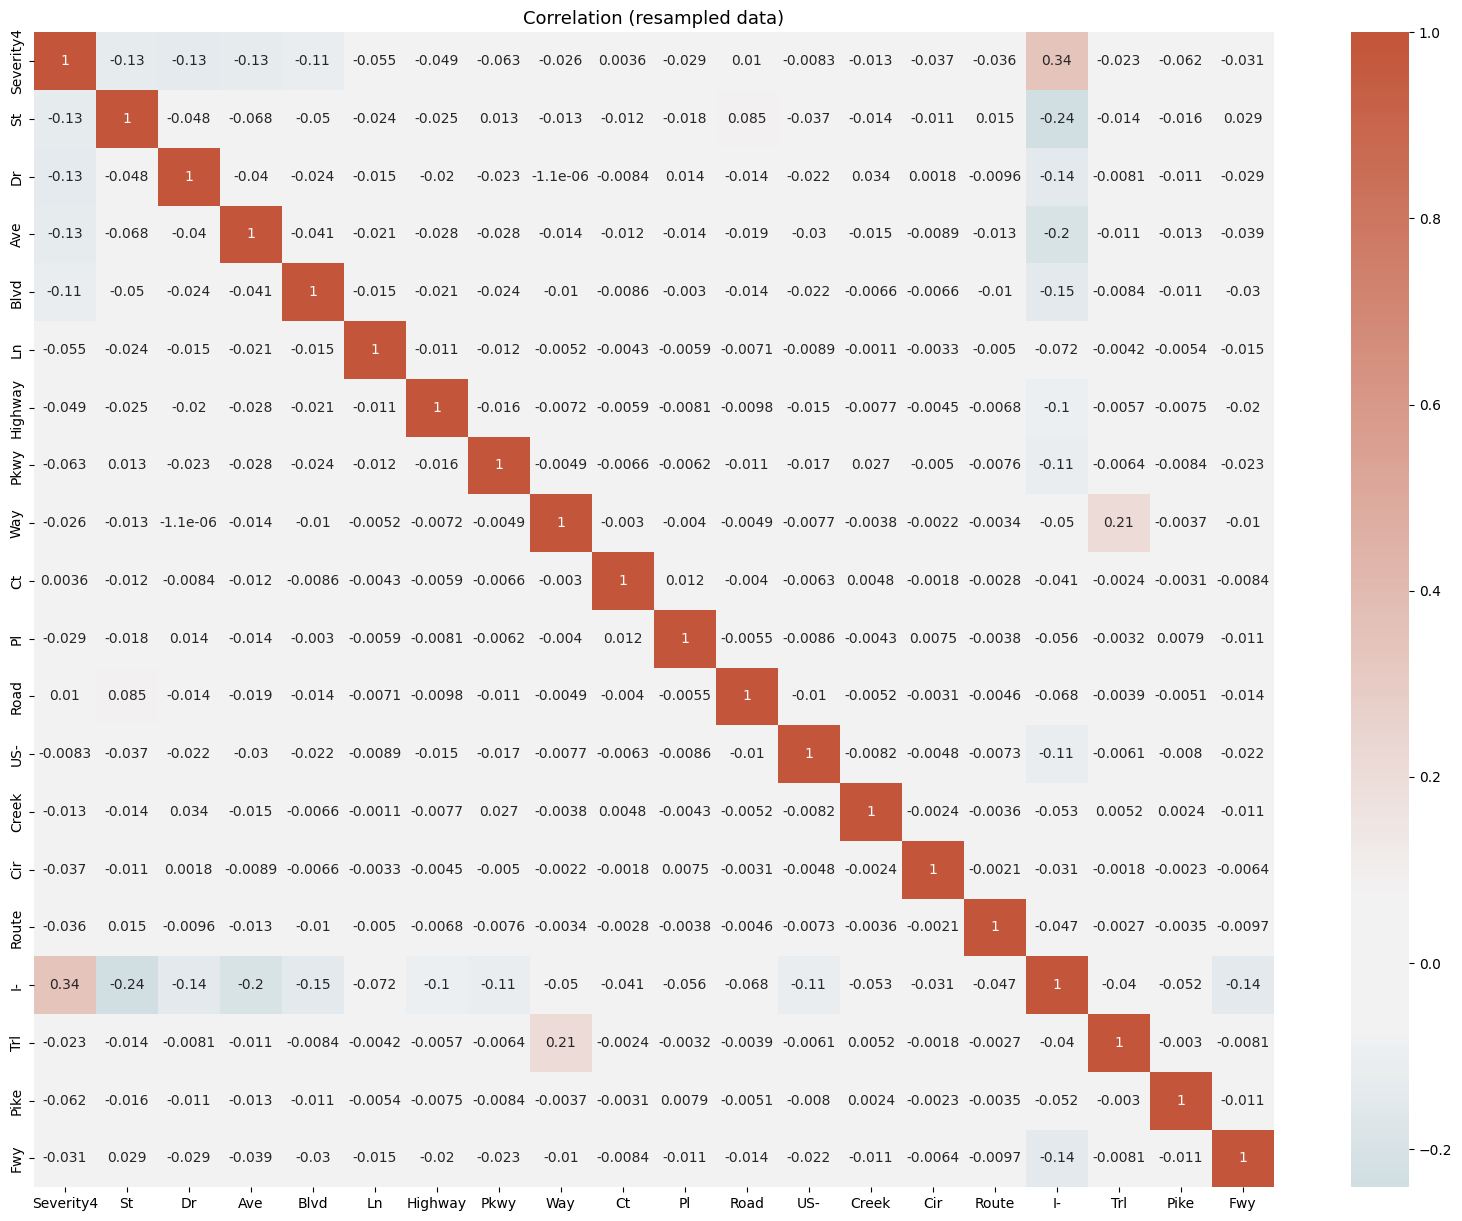

In [60]:
# for each word create a boolean column
for i in st_type:
  df[i.strip()] = np.where(df['Street'].str.contains(i, case=True, na = False), True, False)
df.loc[df['Road']==1,'Rd'] = True
df.loc[df['Highway']==1,'Hwy'] = True

# resample again
df_bl = resample(df, 'Severity4', 20000)

# plot correlation
df_bl['Severity4'] = df_bl['Severity4'].astype(int)
street_corr  = df_bl.loc[:,['Severity4']+[x.strip() for x in st_type if x.strip() not in ['Rd', 'Hwy']]].corr()
plt.figure(figsize=(20,15))
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(street_corr, annot=True, cmap=cmap, center=0).set_title("Correlation (resampled data)", fontsize=13)
plt.show()

Although not strong, there seems to be a weak relationship showing more severity of accidents on Interstate Highway. Other roads seems relatively safe. Let' drop the less correlated features

In [61]:
drop_list = street_corr.index[street_corr['Severity4'].abs()<0.1].to_list()
df = df.drop(drop_list, axis=1)

# resample again
df_bl = resample(df, 'Severity4', 20000)

#### Latitude and Longitude

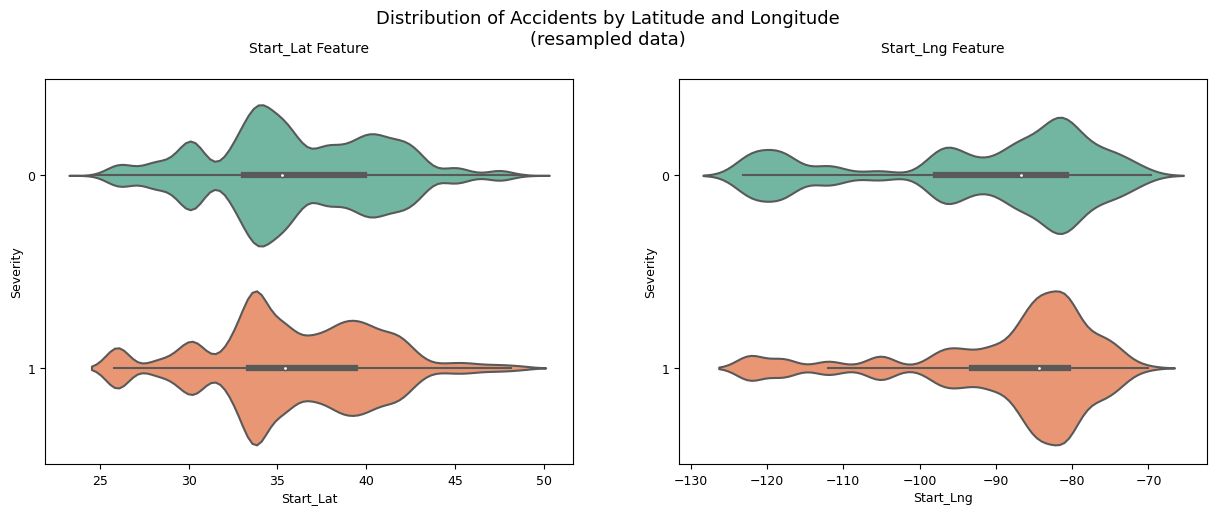

In [62]:
# Convert Severity4 to category
df_bl['Severity4'] = df_bl['Severity4'].astype('category')

# Define features to plot
num_features = ['Start_Lat', 'Start_Lng']

# Create subplots
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(15, 5))  # Adjusted to ncols=2, nrows=1
plt.subplots_adjust(hspace=0.8, wspace=0.2)

# Plot each feature
for i, feature in enumerate(num_features):    
    sns.violinplot(x=feature, y='Severity4', data=df_bl, palette='Set2', ax=axs[i])
    axs[i].set_xlabel('{}'.format(feature), size=9, labelpad=3)
    axs[i].set_ylabel('Severity', size=9, labelpad=3)
    axs[i].tick_params(axis='x', labelsize=9)
    axs[i].tick_params(axis='y', labelsize=9)
    axs[i].set_title('{} Feature'.format(feature), size=10, y=1.05)

# Adjust the title of the figure
fig.suptitle('Distribution of Accidents by Latitude and Longitude\n(resampled data)', fontsize=13, y=1.02)
plt.show()

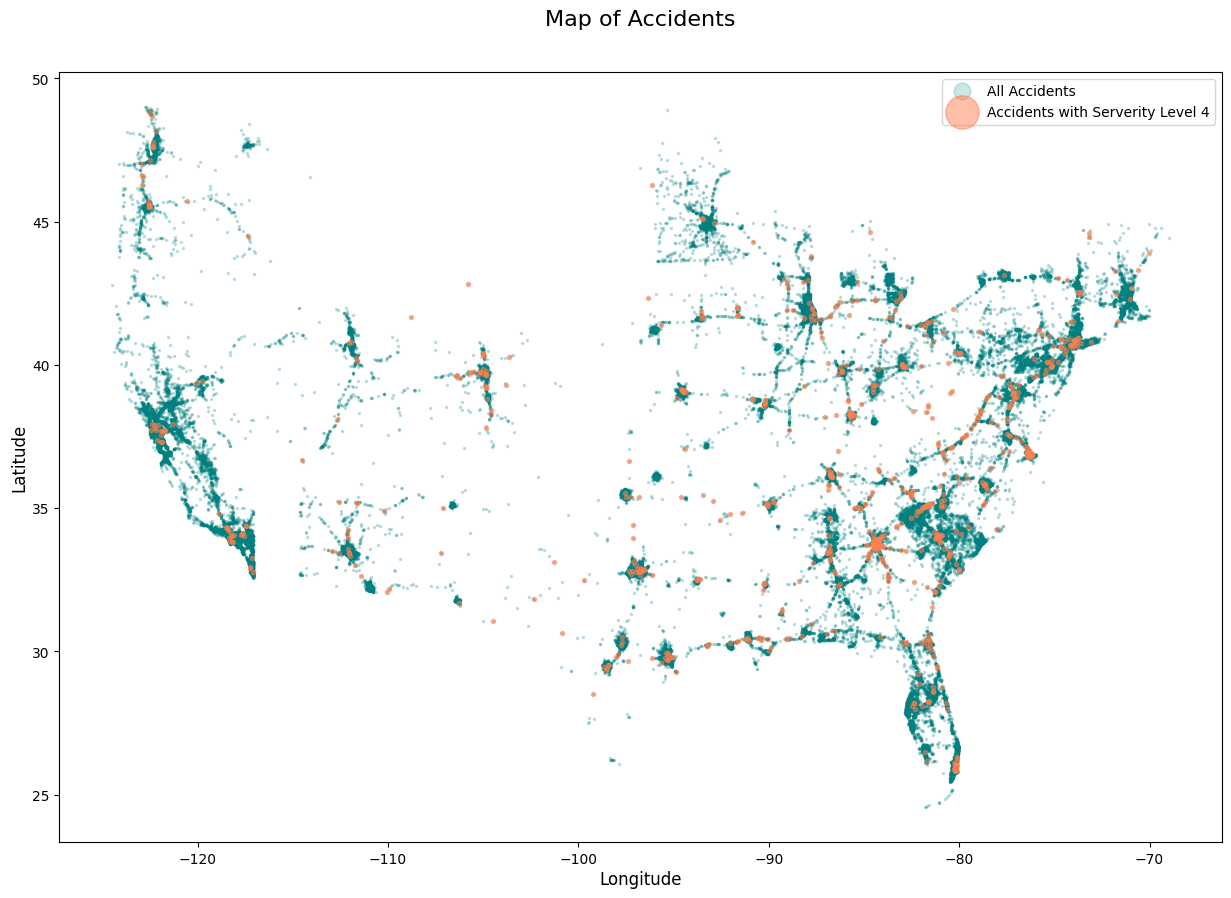

In [63]:
# Accidents mapped

df_4 = df[df['Severity4']==1]

plt.figure(figsize=(15,10))

plt.plot( 'Start_Lng', 'Start_Lat', data=df, linestyle='', marker='o', markersize=1.5, color="teal", alpha=0.2, label='All Accidents')
plt.plot( 'Start_Lng', 'Start_Lat', data=df_4, linestyle='', marker='o', markersize=3, color="coral", alpha=0.5, label='Accidents with Serverity Level 4')
plt.legend(markerscale=8)
plt.xlabel('Longitude', size=12, labelpad=3)
plt.ylabel('Latitude', size=12, labelpad=3)
plt.title('Map of Accidents', size=16, y=1.05)
plt.show()


#### Frequency Encoding

Some location features like `Street`, `City`, `Zipcode` have too many unique values. Therefore can be freqency encoded and applied log-transform

In [64]:
fre_list = ['Street', 'City', 'County', 'Zipcode', 'Airport_Code','State']
for i in fre_list:
  newname = i + '_Freq'
  df[newname] = df.groupby([i])[i].transform('count')
  df[newname] = df[newname]/df.shape[0]*df[i].unique().size
  df[newname] = df[newname].apply(lambda x: np.log(x+1))

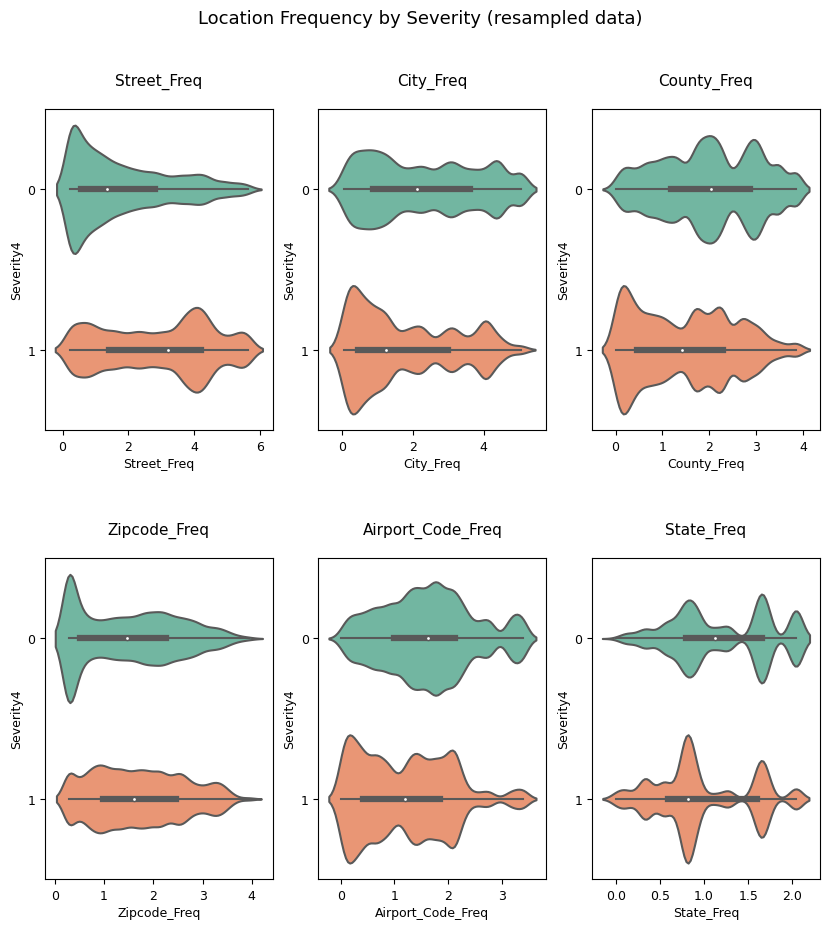

In [65]:
# resample again
df_bl = resample(df, 'Severity4', 20000)

df_bl['Severity4'] = df_bl['Severity4'].astype('category')
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(10, 10))
plt.subplots_adjust(hspace=0.4,wspace = 0.2)
fig.suptitle('Location Frequency by Severity (resampled data)', fontsize=13)
for i, feature in enumerate(fre_list, 1): 
    feature = feature + '_Freq'   
    plt.subplot(2, 3, i)
    sns.violinplot(x=feature, y="Severity4", data=df_bl, palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=9, labelpad=3)
    plt.ylabel('Severity4', size=9, labelpad=3)    
    plt.tick_params(axis='x', labelsize=9)
    plt.tick_params(axis='y', labelsize=9)

    plt.title('{}'.format(feature), size=11, y=1.05)
plt.show()

Comparing `Street` and `City` we can see two different trends. More severe accidents seem to happen frequently at some specific number of streets. Whereas it is more distributed across cities. It is thus safe to say these severe accident hotspots are distributed across cities.

Less severe accidents are more distributed

In [66]:
df = df.drop(fre_list, axis  = 1)

### 3.4 Weather Features

#### Continuous Weather Features

Normalize features with extreamly skewed distribution first.

In [67]:
df['Pressure_bc']= boxcox(df['Pressure(in)'].apply(lambda x: x+1),lmbda=6)
df['Visibility_bc']= boxcox(df['Visibility(mi)'].apply(lambda x: x+1),lmbda = 0.1)
df['Wind_Speed_bc']= boxcox(df['Wind_Speed(mph)'].apply(lambda x: x+1),lmbda=-0.2)
df = df.drop(['Pressure(in)','Visibility(mi)','Wind_Speed(mph)'], axis=1)

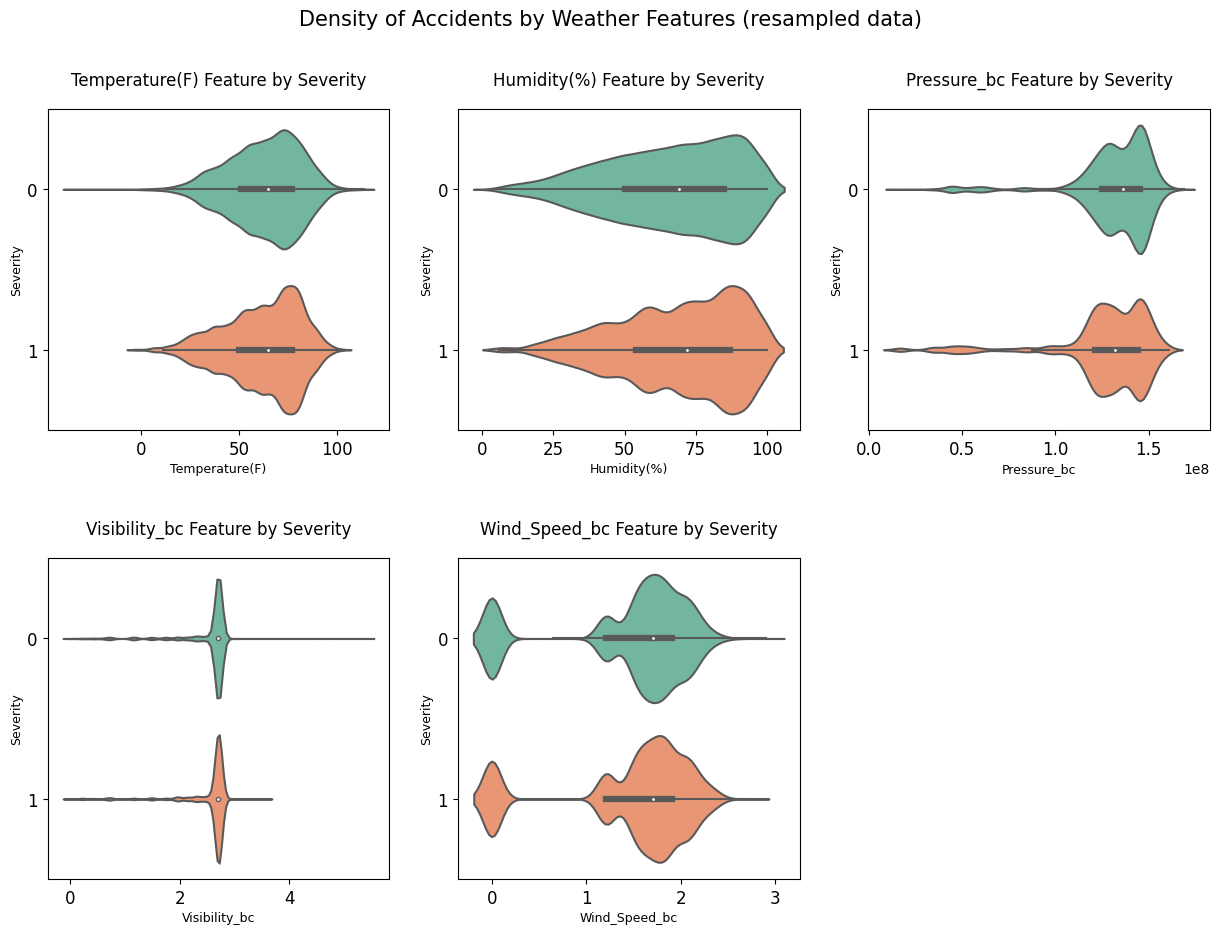

In [68]:
# resample again
df_bl = resample(df, 'Severity4', 20000)

df_bl['Severity4'] = df_bl['Severity4'].astype('category')
num_features = ['Temperature(F)', 'Humidity(%)', 'Pressure_bc', 'Visibility_bc', 'Wind_Speed_bc']
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(15, 10))
plt.subplots_adjust(hspace=0.4,wspace = 0.2)
for i, feature in enumerate(num_features, 1):    
    plt.subplot(2, 3, i)
    sns.violinplot(x=feature, y="Severity4", data=df_bl, palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=9, labelpad=3)
    plt.ylabel('Severity', size=9, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)

    plt.title('{} Feature by Severity'.format(feature), size=12, y=1.05)
fig.suptitle('Density of Accidents by Weather Features (resampled data)', fontsize=15)
plt.show()

#### Weather Conditions

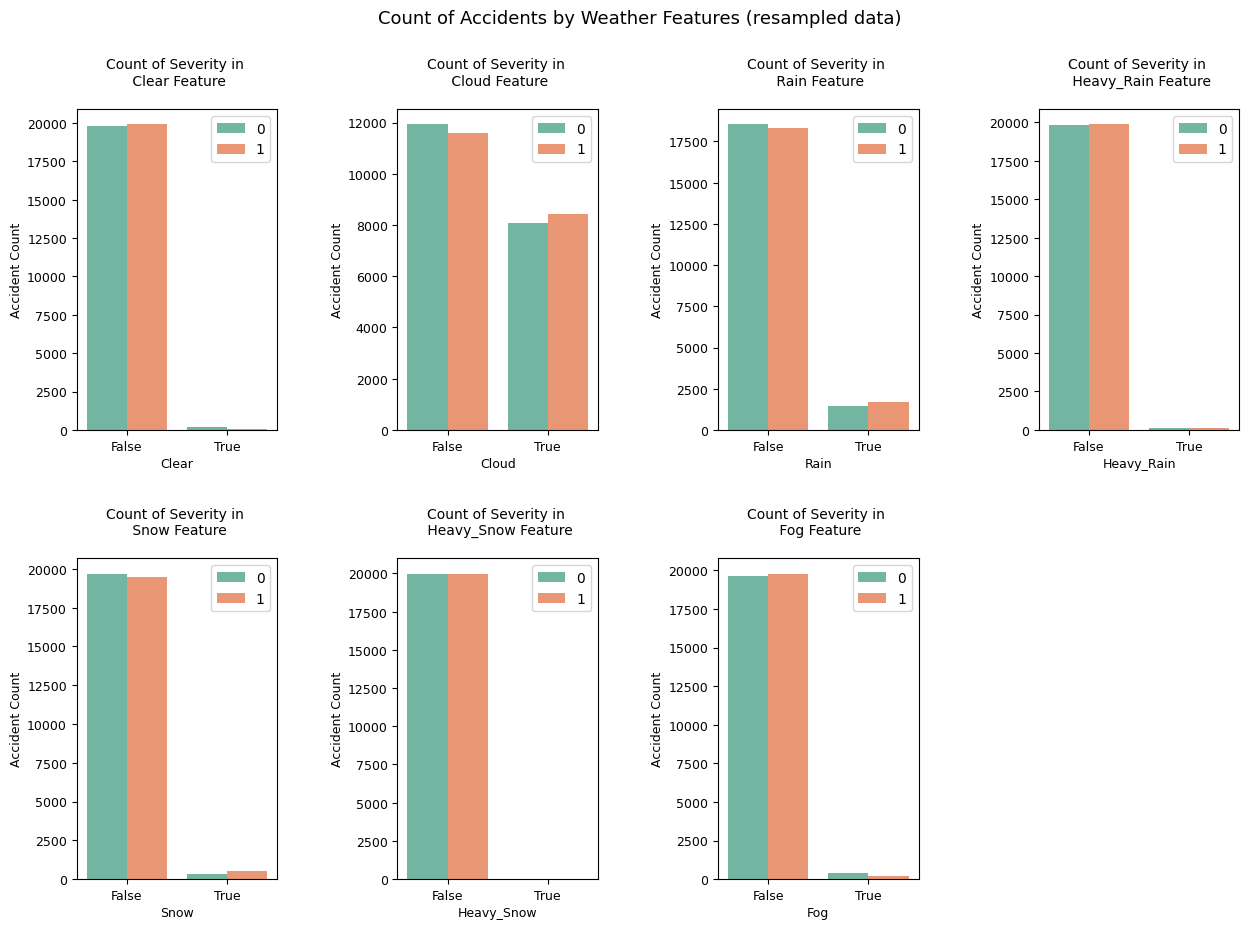

In [69]:
weather = ['Clear', 'Cloud', 'Rain', 'Heavy_Rain', 'Snow', 'Heavy_Snow', 'Fog']

fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(15, 10))
plt.subplots_adjust(hspace=0.4,wspace = 0.6)
for i, feature in enumerate(weather, 1):    
    plt.subplot(2, 4, i)
    sns.countplot(x=feature, hue='Severity4', data=df_bl ,palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=9, labelpad=3)
    plt.ylabel('Accident Count', size=9, labelpad=3)    
    plt.tick_params(axis='x', labelsize=9)
    plt.tick_params(axis='y', labelsize=9)
    
    plt.legend(['0', '1'], loc='upper right', prop={'size': 10})
    plt.title('Count of Severity in \n {} Feature'.format(feature), size=10, y=1.05)
fig.suptitle('Count of Accidents by Weather Features (resampled data)', fontsize=13)
plt.show()

As seen from above, accidents are little more likely to be serious during rain or snow

In [70]:
df = df.drop(['Heavy_Rain','Heavy_Snow','Fog'], axis  = 1)

#### Wind Direction

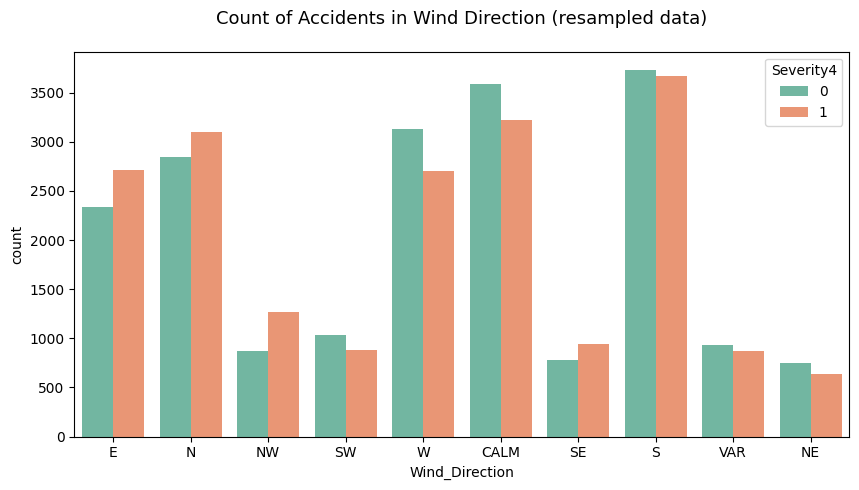

In [71]:
plt.figure(figsize=(10,5))
chart = sns.countplot(x='Wind_Direction', hue='Severity4', data=df_bl ,palette="Set2")
plt.title("Count of Accidents in Wind Direction (resampled data)", size=13, y=1.05)
plt.show()

In [72]:
df = df.drop(['Wind_Direction'], axis=1)

### 3.5 POI Features

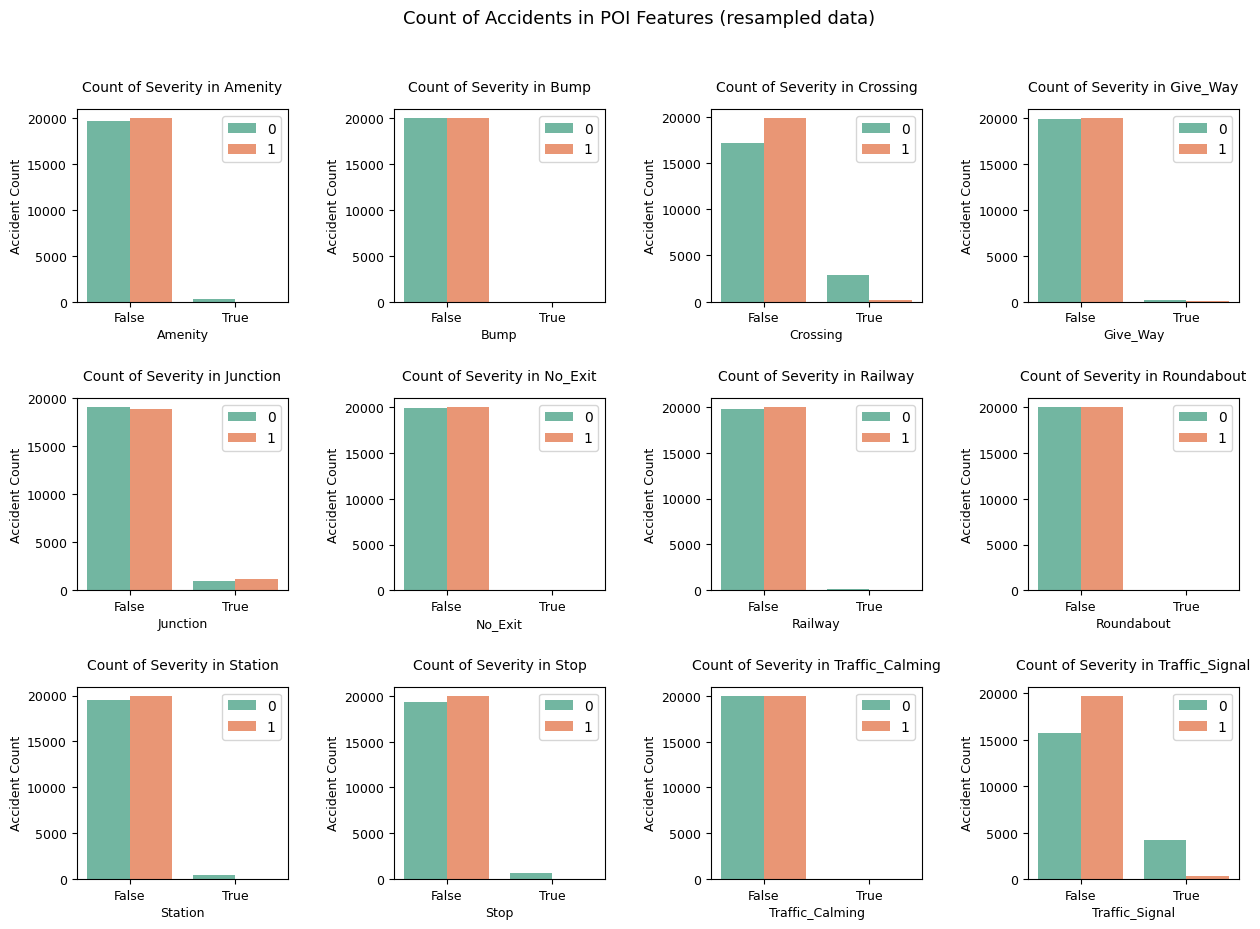

In [73]:
POI_features = ['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal']

fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(15, 10))

plt.subplots_adjust(hspace=0.5,wspace = 0.5)
for i, feature in enumerate(POI_features, 1):    
    plt.subplot(3, 4, i)
    sns.countplot(x=feature, hue='Severity4', data=df_bl ,palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=9, labelpad=3)
    plt.ylabel('Accident Count', size=9, labelpad=3)    
    plt.tick_params(axis='x', labelsize=9)
    plt.tick_params(axis='y', labelsize=9)
    
    plt.legend(['0', '1'], loc='upper right', prop={'size': 10})
    plt.title('Count of Severity in {}'.format(feature), size=10, y=1.05)
fig.suptitle('Count of Accidents in POI Features (resampled data)', fontsize=13)
plt.show()

Accidents near traffic signal and crossing are much less likely to be severe. It might be because people slow down on approaching. As far as other POI features are concerned, there is severe imbalance and no useful assumption can be made

Drop some features

1. `Bump`
2. `Give_Way`
3. `No_Exit`
4. `Roundabout`
5. `Traffic_Calming`

In [74]:
df= df.drop(['Amenity','Bump','Give_Way','No_Exit','Roundabout','Traffic_Calming'], axis=1)

### 3.6 Correlation

In [75]:
period_features = ['Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']

# one-hot encoding
df[period_features] = df[period_features].astype('category')
df = pd.get_dummies(df, columns=period_features, drop_first=True)
df = pd.get_dummies(df, columns=['Timezone'], drop_first=True)

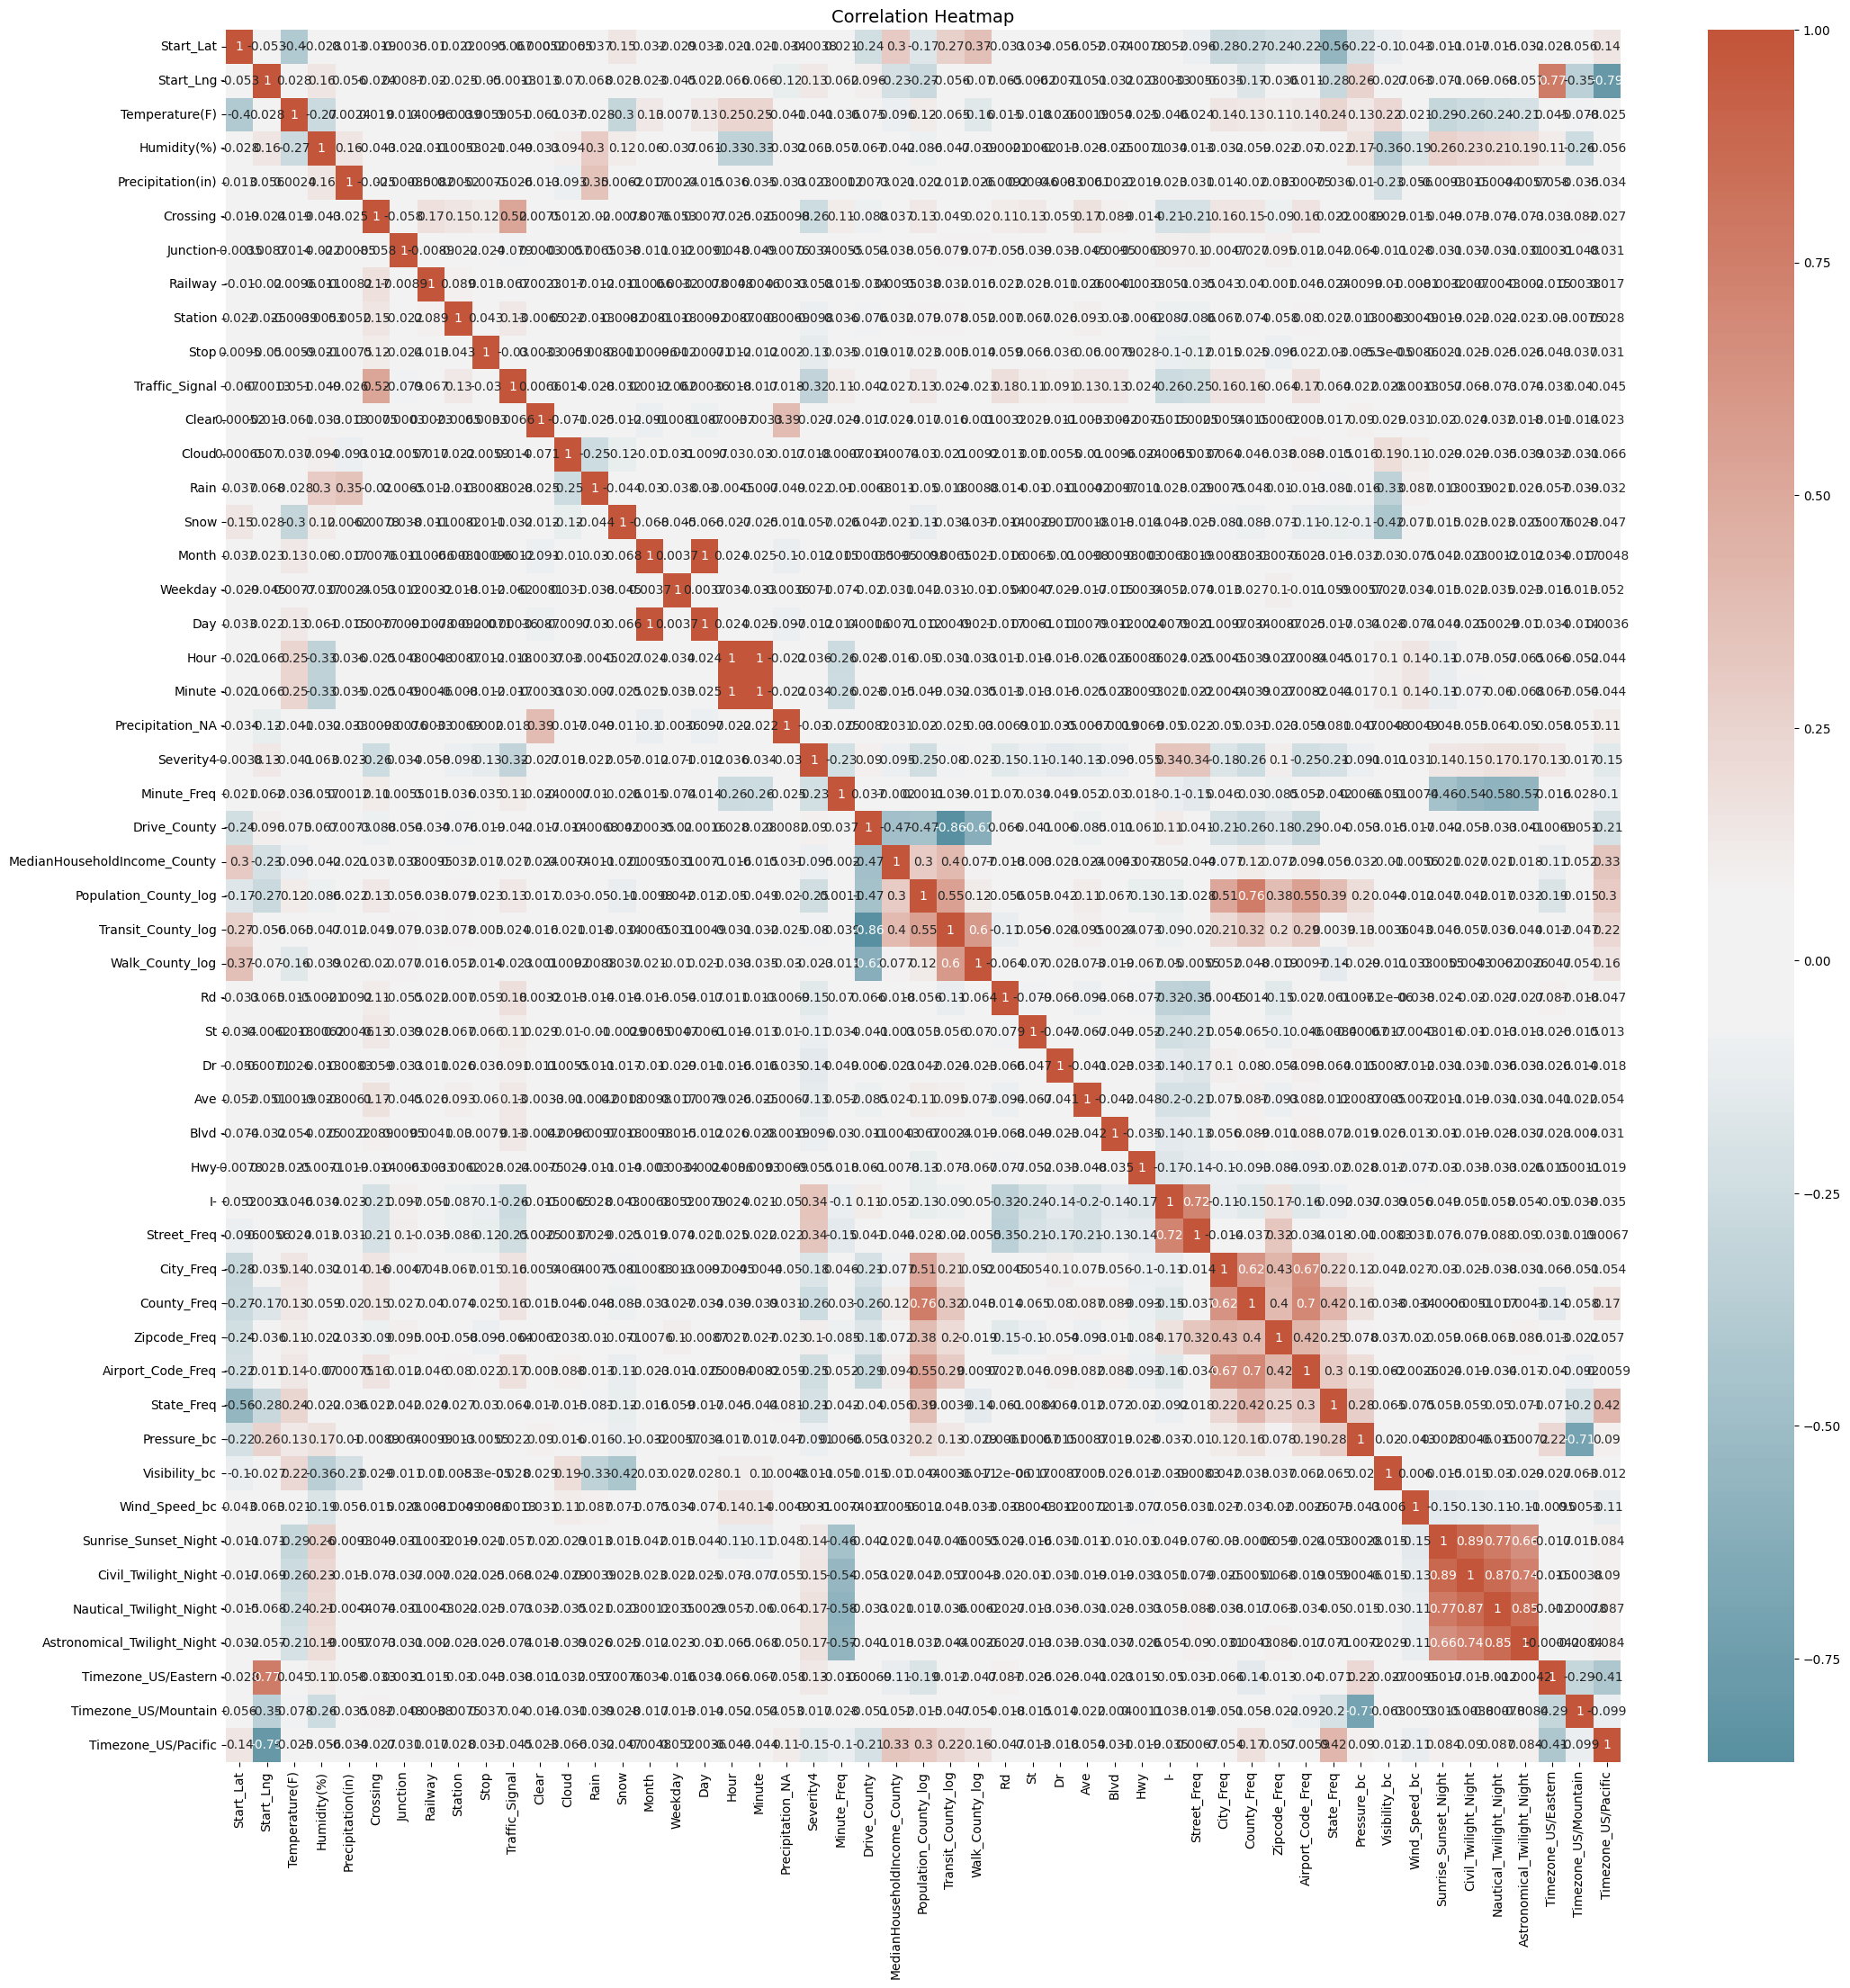

In [76]:
# resample again
df_bl = resample(df, 'Severity4', 20000)

# plot correlation
df_bl['Severity4'] = df_bl['Severity4'].astype(int)
plt.figure(figsize=(25,25))
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(df_bl.corr(), annot=True,cmap=cmap, center=0).set_title("Correlation Heatmap", fontsize=14)
plt.show()

In [77]:
df = df.drop(['Temperature(F)', 'Humidity(%)', 'Precipitation(in)', 'Precipitation_NA','Visibility_bc', 'Wind_Speed_bc',
              'Clear','Cloud','Snow','Crossing','Junction','Railway','Month',
              'Hour', 'Day','Minute','MedianHouseholdIncome_County', 'Transit_County_log', 
              'Walk_County_log','Drive_County', 'City_Freq','County_Freq','Airport_Code_Freq','Zipcode_Freq',
              'Sunrise_Sunset_Night', 'Civil_Twilight_Night', 'Nautical_Twilight_Night'], axis=1)

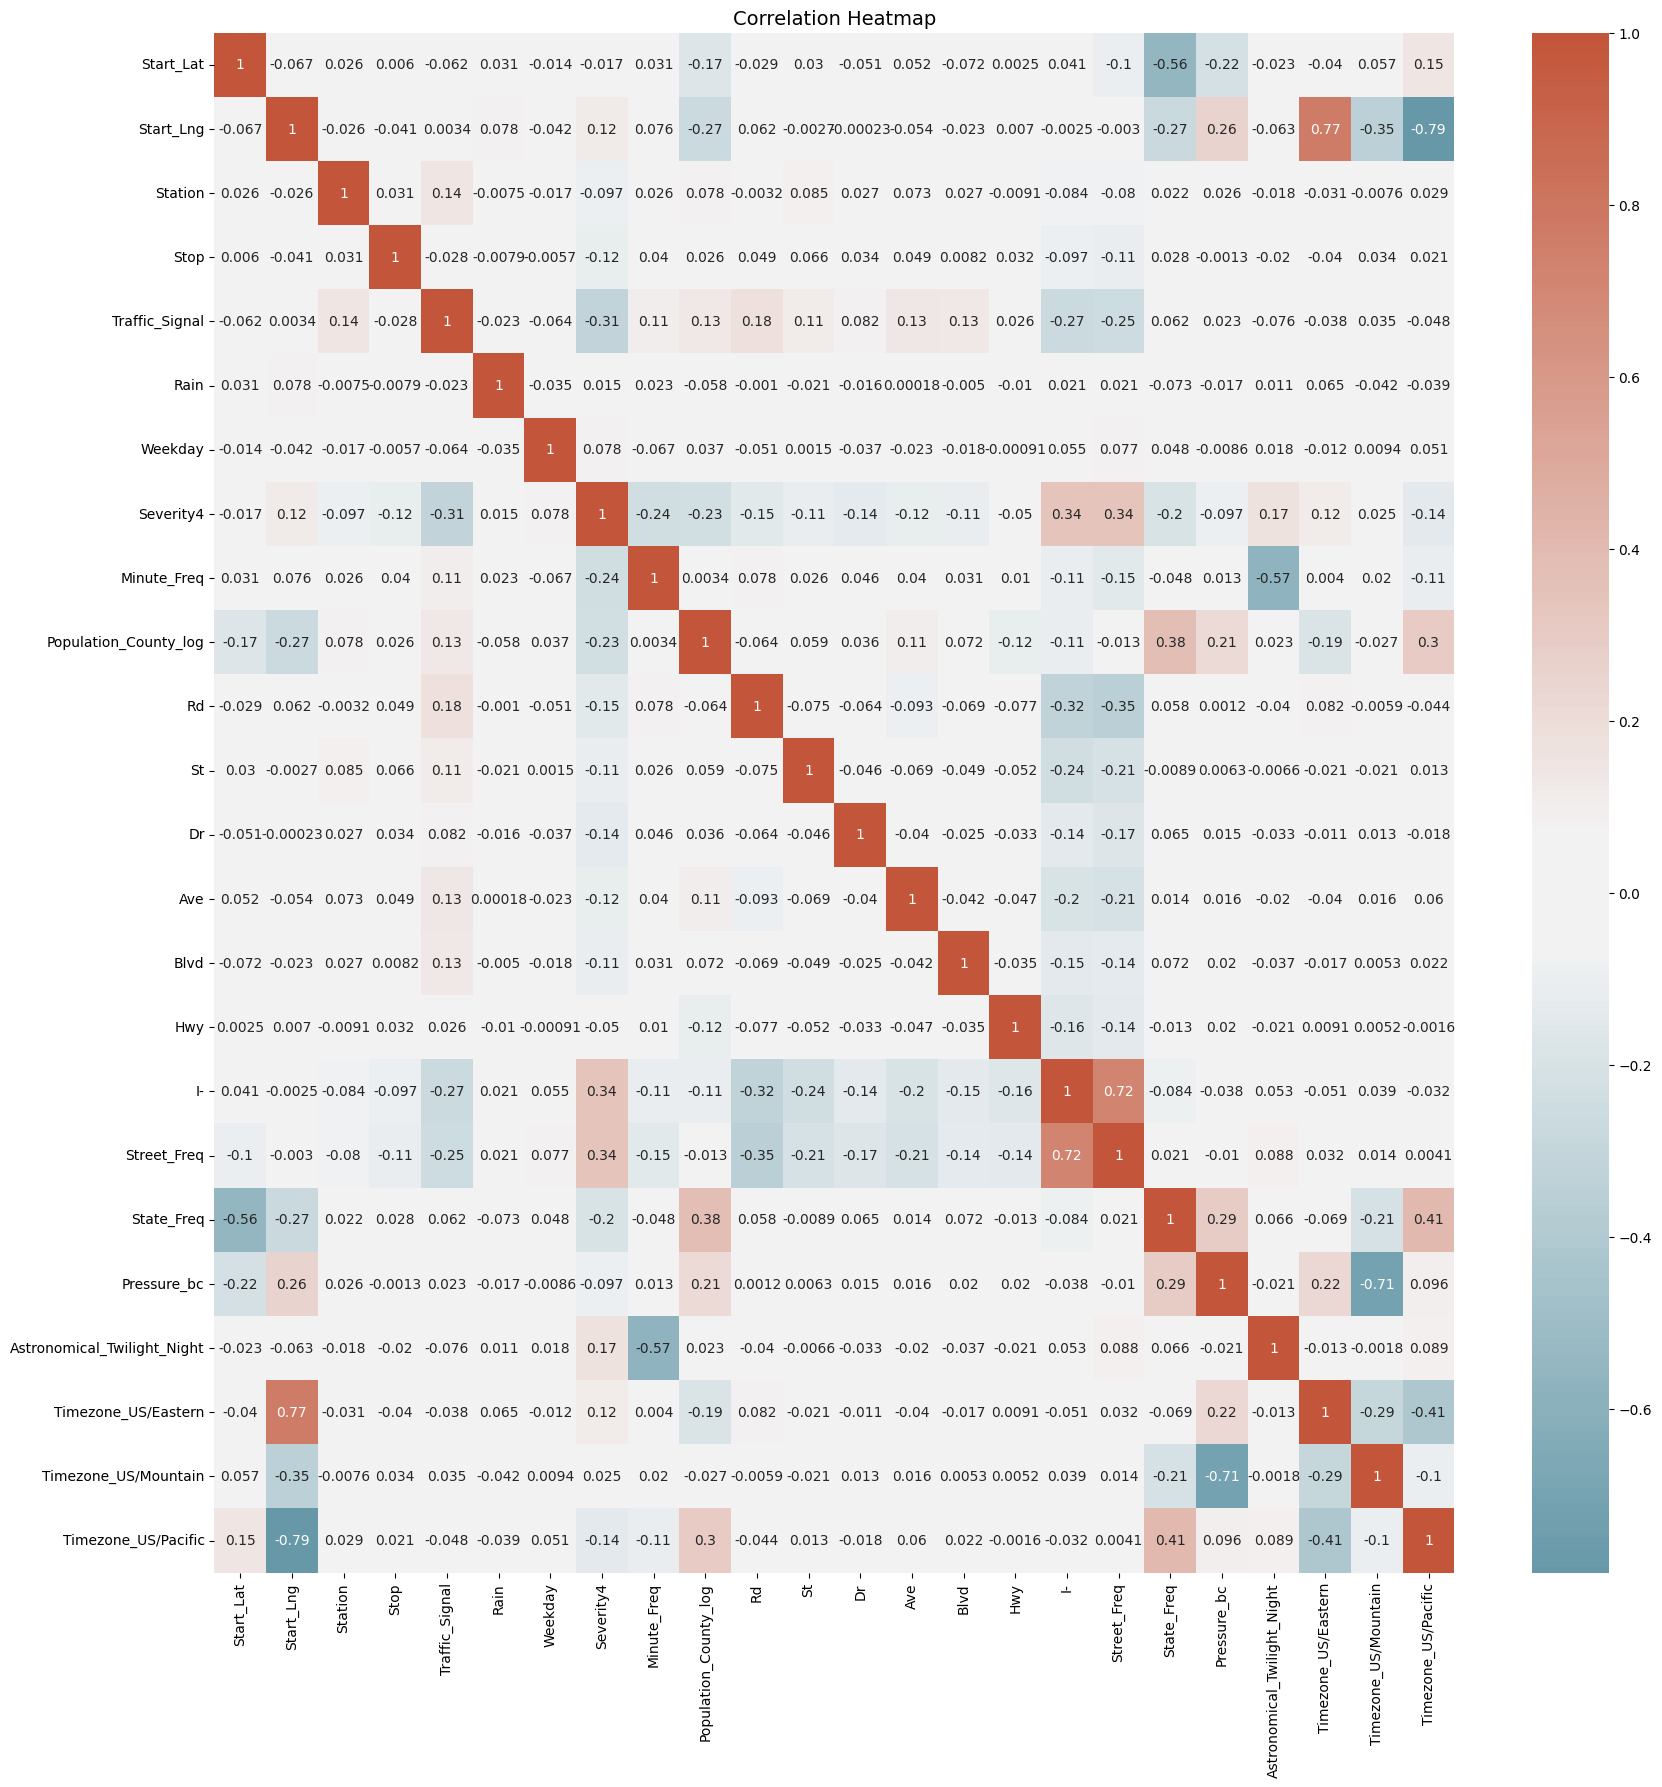

In [78]:
# resample again
df_bl = resample(df, 'Severity4', 20000)

# plot correlation
df_bl['Severity4'] = df_bl['Severity4'].astype(int)
plt.figure(figsize=(20,20))
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(df_bl.corr(), annot=True,cmap=cmap, center=0).set_title("Correlation Heatmap", fontsize=14)
plt.show()

### 3.7 One-hot Encoding 

One-hot encode categorical features

In [79]:
cat = ['Weekday']
df[cat] = df[cat].astype('category')
df = pd.get_dummies(df, columns=cat, drop_first=True)

df = df.replace([True, False], [1,0])

# downcasting for memory efficiency
df_int = df.select_dtypes(include=['int']).apply(pd.to_numeric,downcast='unsigned')
df_float = df.select_dtypes(include=['float']).apply(pd.to_numeric,downcast='float')
df = pd.concat([df.select_dtypes(include=['uint8']),df_int,df_float],axis=1)

df.info()

/tmp/ipykernel_17/3854814485.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace([True, False], [1,0])


<class 'pandas.core.frame.DataFrame'>
Index: 102958 entries, 1 to 4460
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Station                      102958 non-null  uint8  
 1   Stop                         102958 non-null  uint8  
 2   Traffic_Signal               102958 non-null  uint8  
 3   Rain                         102958 non-null  uint8  
 4   Severity4                    102958 non-null  uint8  
 5   Rd                           102958 non-null  uint8  
 6   St                           102958 non-null  uint8  
 7   Dr                           102958 non-null  uint8  
 8   Ave                          102958 non-null  uint8  
 9   Blvd                         102958 non-null  uint8  
 10  Hwy                          102958 non-null  uint8  
 11  I-                           102958 non-null  uint8  
 12  Astronomical_Twilight_Night  102958 non-null  uint8  
 13  Timezo

These are the final 28 features that were identified for modeling.